In [2]:
import nltk
import re

from nltk import grammar, parse
from nltk.parse.util import load_parser

from typing import Callable, List, Set


# Chat GPT Story Parser: Gordon Copeland (gcc68), Shiman Zhang (sz383), and Teddy Lazar (tl688)




### Here is the list of words we used as input to chatgpt. 

In [3]:
vocabulary = ['the', 'dog', 'ran', 'home', 'and', 'cat', 'followed', 'to', 'play', 'they', 'arrived', 
              'house', 'was', 'empty', 'whined', 'meowed', 'in', 'response', 'searched', 'every', 'room', 
              'but', 'found', 'no', 'sign', 'of', 'owner', 'feeling', 'worried', 'confused', 'decided', 
              'sit', 'by', 'door', 'wait', 'hours', 'passed', 'as', 'sun', 'began', 'set', 'started', 'give',
              'up', 'hope', 'heard', 'sound', 'a', 'car', 'that', 'pulling', 'into', 'driveway', 'rushed', 
              'wagging', 'their', 'tails', 'meowing', 'excitedly', 'walked', 'scooped', 'both', 'them', 
              'giving', 'each', 'pat', 'on', 'head', 'i', 'am', 'sorry', 'gone', 'for', 'long', 'walk', 'came', 
              'back', 'late', 'today', 'said', 'did', 'not', 'mind', 'because', 'so', 'happy', 'be', 'see', 
              'you', 'waiting', 'me', 'there', 'wagged', 'gave', 'curtains', 'drawers', 'saw', 'were', 'it',
              'sunset', 'happily']

In [4]:
nltk.data.show_cfg('./ling4424-final.fcfg')

% start S
# Grammar Rules
S/NP -> NP/NP VP
CP -> 'that' S/NP
N -> N CP
NP/NP ->
S -> DP VP
S -> S Conj S
S -> 'there' V DP
S -> 'sorry' PP
S -> DC S
S -> S DC
DC -> 'as' S
DC -> VBG AP
AP -> AP Conj AP
DP -> Det N
DP -> N
DP -> NP
DP -> 'both' 'of' DP
DP -> DP PP
DP -> Det NP
DP -> DP VBG
NP -> AP N
N -> N 'and' N
VP[coor=no] -> IV
VP[coor=no] -> V AP
VP[coor=no] -> V A[EM=yes] 'that' S
VP[coor=no] -> V N
VP[coor=no] -> VP[coor=no] PP
VP[coor=no] -> VP[coor=no] PaP
VP[coor=no] -> VP[coor=no] ADV
VP[coor=no] -> TV DP
VP[coor=no] -> TV INP
VP[coor=yes] -> VP Conj VP
VP[coor=yes] -> VP Conj VP
VP -> V VBGP
VP -> AUX ADV VP
VBGP -> VBG[trans=tr] PP
VBGP -> VBG[trans=in]
VBGP -> VBG[trans=di] DP DP
INP -> 'to' IV
PP -> P DP
PP -> P VP
PaP -> PaP Conj PaP
PaP -> VBG DP
PaP -> VBG ADV
PaP -> VBG[trans=di] DP DP
AP -> ADV A
AP -> A
AP -> AP PP
ADV -> ADV Conj ADV
# Lexical Rules
#Determiners#
Det -> 'no'
Det -> 'a'
Det -> 'the'
Det -> 'every'
Det -> 'both'
Det -> 'their'
#Nouns#
N -> 'car'
N -

In [5]:
def parse_and_display(s, p, graphic:bool=True):
    for tree in p.parse(s.split()): 
        if graphic: 
            display(tree) 
        else: print(tree)

## Short Story 1:
The dog ran home, and the cat followed to play. They arrived and the house was empty. The dog whined, and the cat meowed in response. They searched every room but found no sign of the owner. Feeling worried and confused, they decided to sit by the door and wait. Hours passed, and as the sun began to set, they started to give up hope. They heard the sound of a car that was pulling into the driveway. They rushed to the door, wagging their tails and meowing excitedly. The owner walked in and scooped both of them up, giving each a pat on the head. "I am sorry I was gone for a long walk and came back late today," the owner said. "I did not mind because I am so happy to be back and see you both, waiting for me."

In [9]:
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)

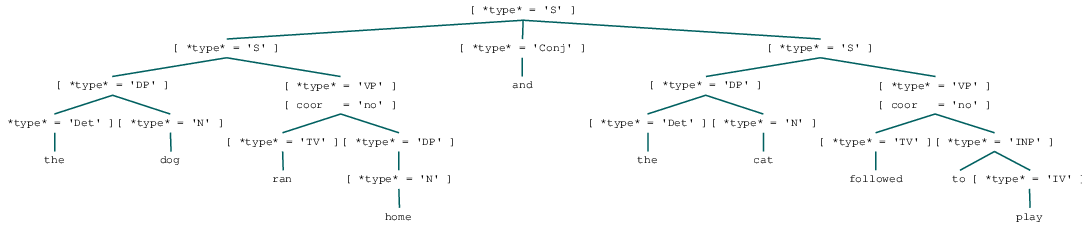

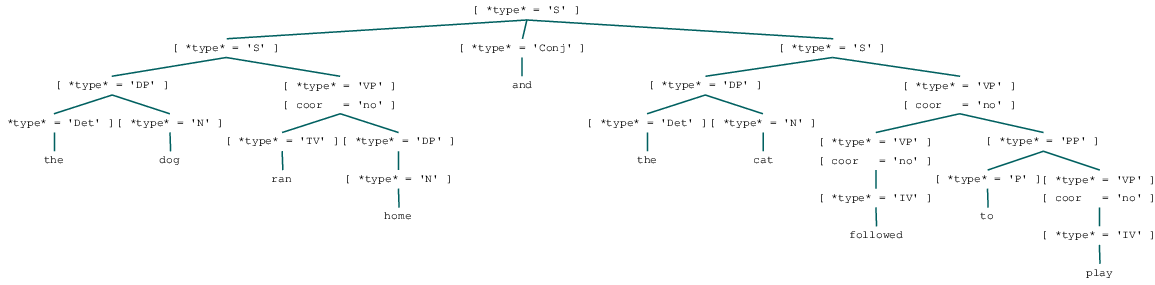

In [8]:
s1 = 'the dog ran home and the cat followed to play'
parse_and_display(s1, pr)

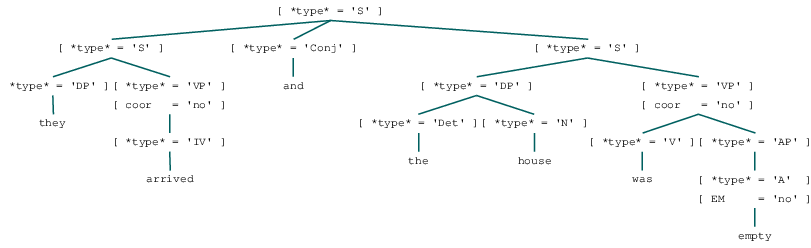

In [490]:
s2 = 'they arrived and the house was empty'
parse_and_display(s2, pr)

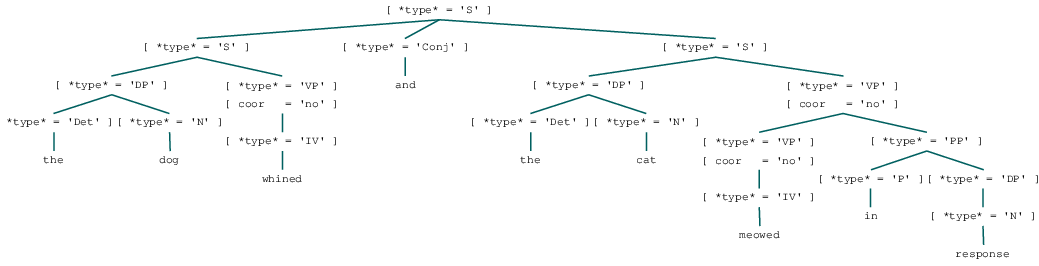

In [491]:
s3 = 'the dog whined and the cat meowed in response'
parse_and_display(s3, pr)

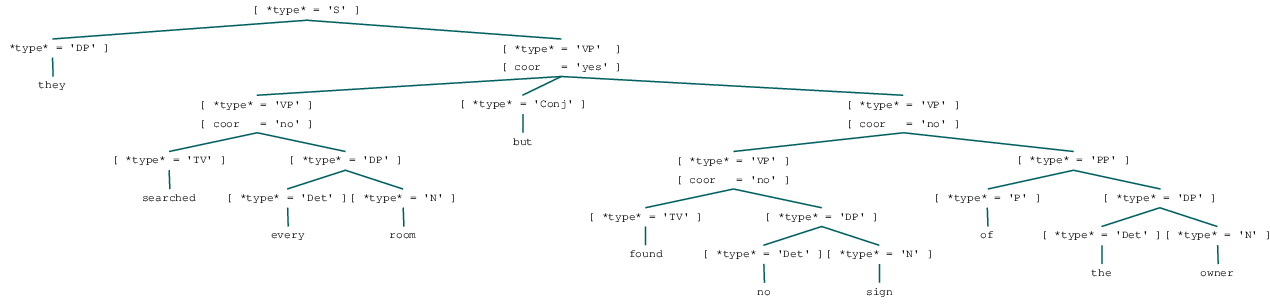

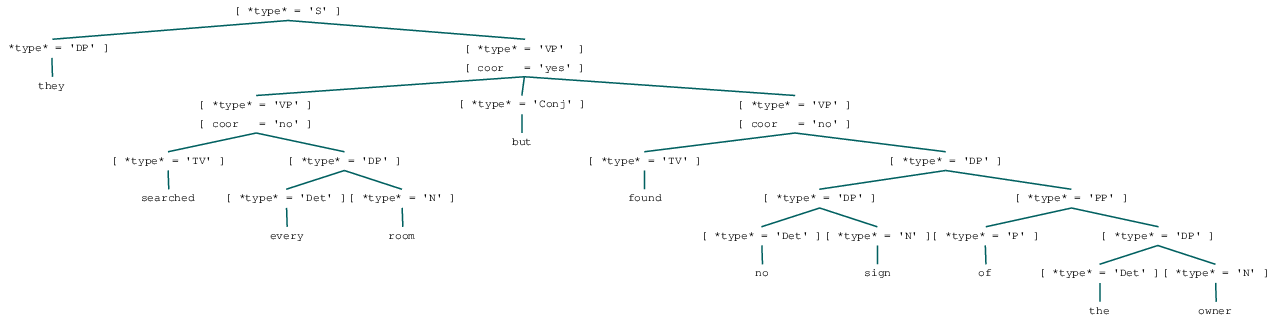

In [492]:
s4 = 'they searched every room but found no sign of the owner'
parse_and_display(s4, pr)

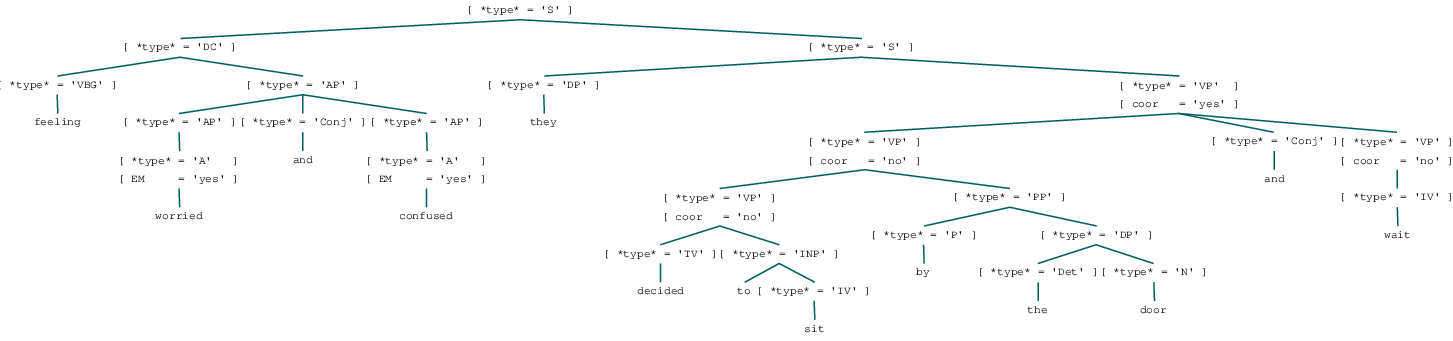

In [493]:
s5 = 'feeling worried and confused they decided to sit by the door and wait'
parse_and_display(s5, pr)

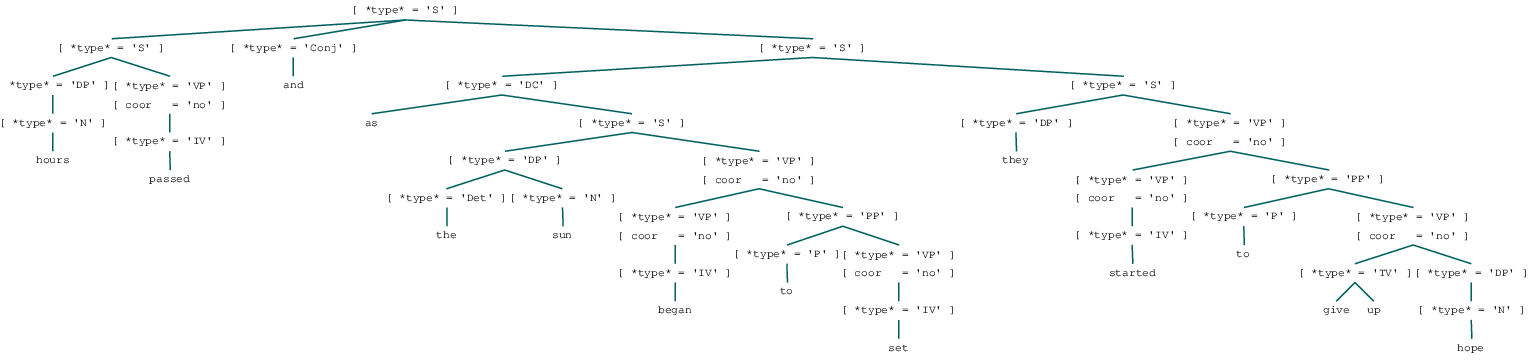

In [494]:
s6 = 'hours passed and as the sun began to set they started to give up hope'
parse_and_display(s6, pr)

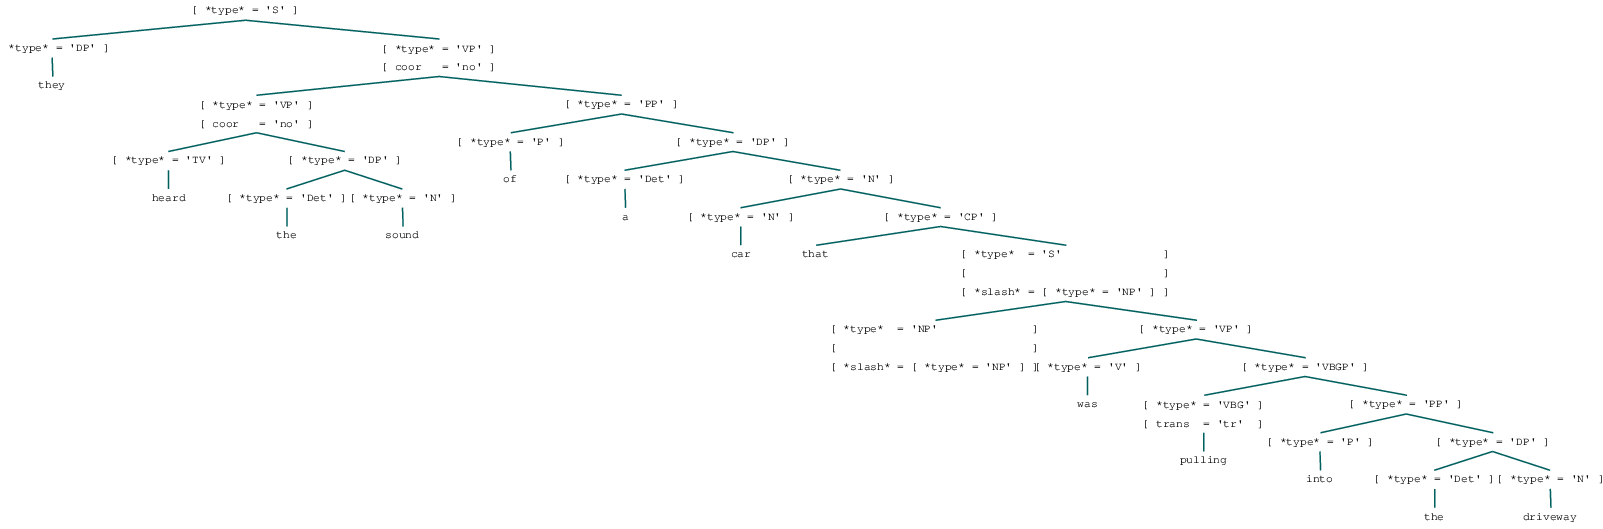

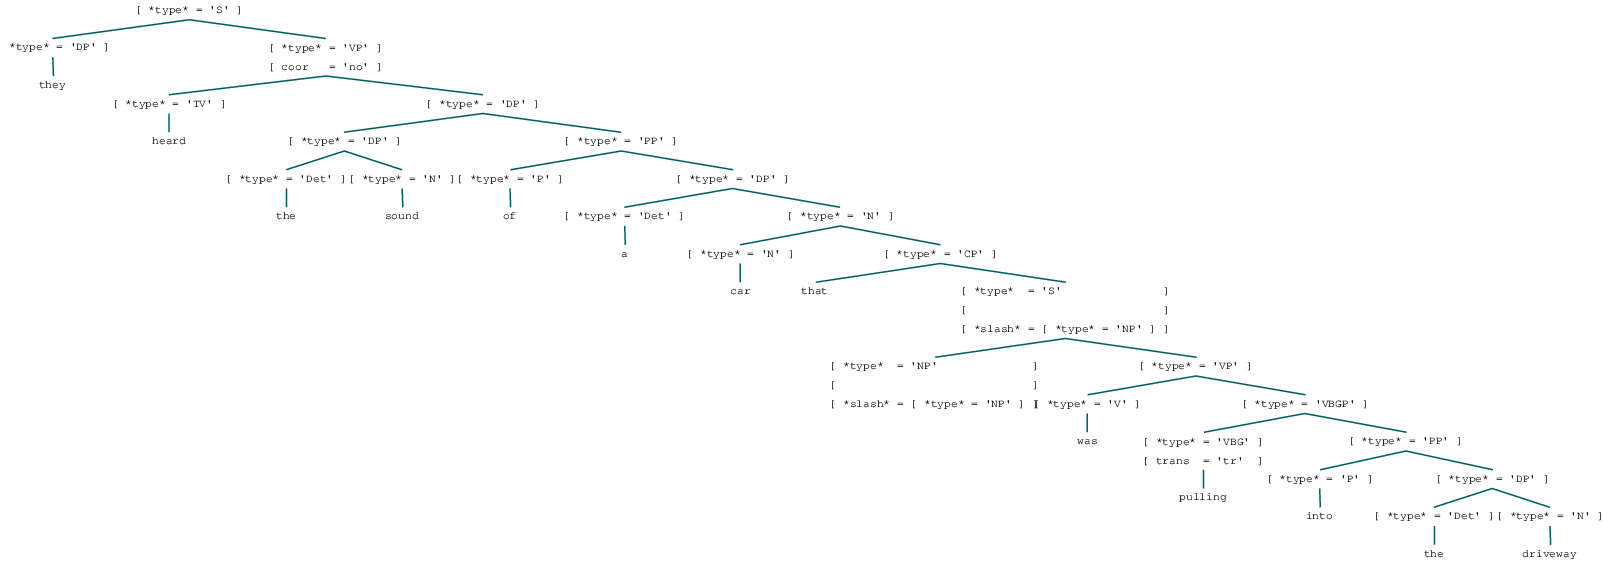

In [495]:
s7 = 'they heard the sound of a car that was pulling into the driveway'
parse_and_display(s7, pr)

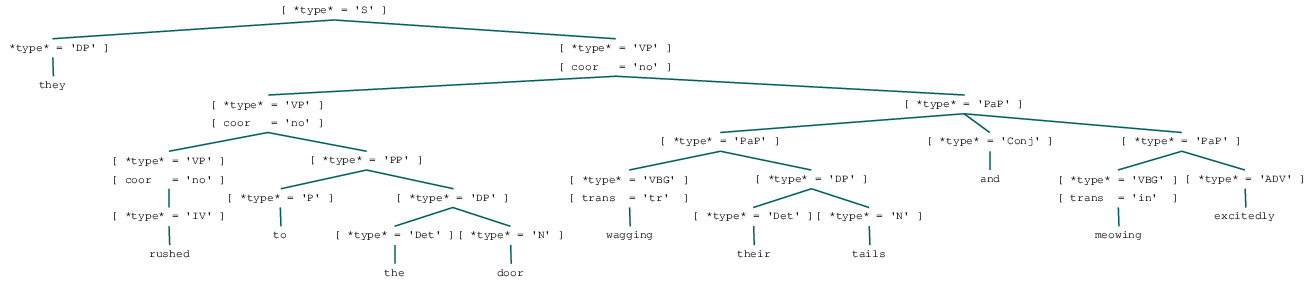

In [496]:
s8 = 'they rushed to the door wagging their tails and meowing excitedly'
parse_and_display(s8, pr)

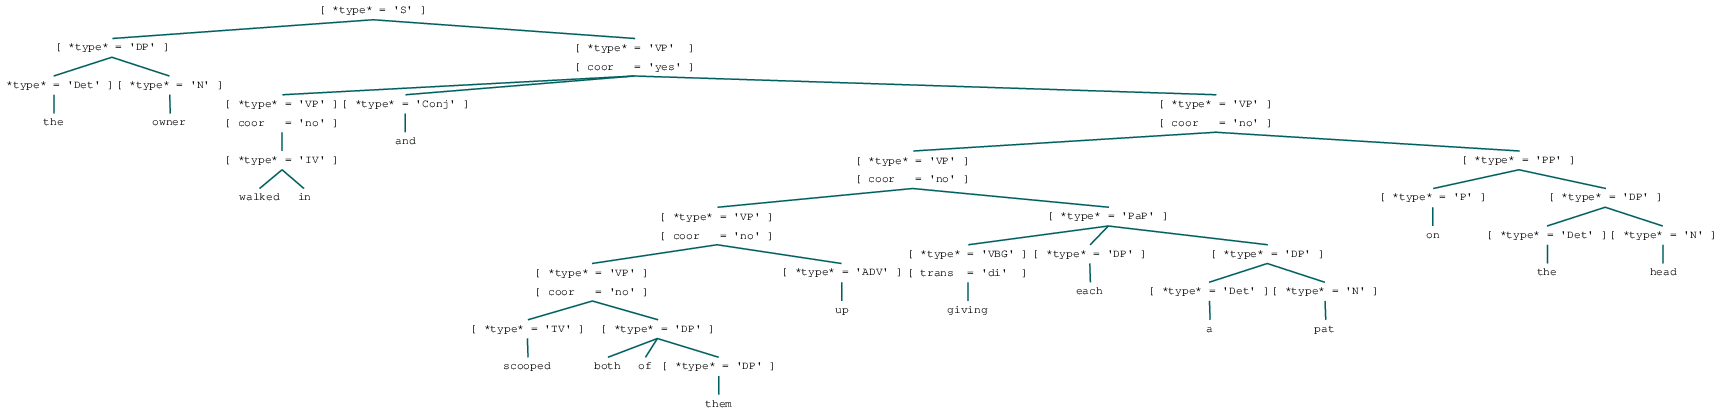

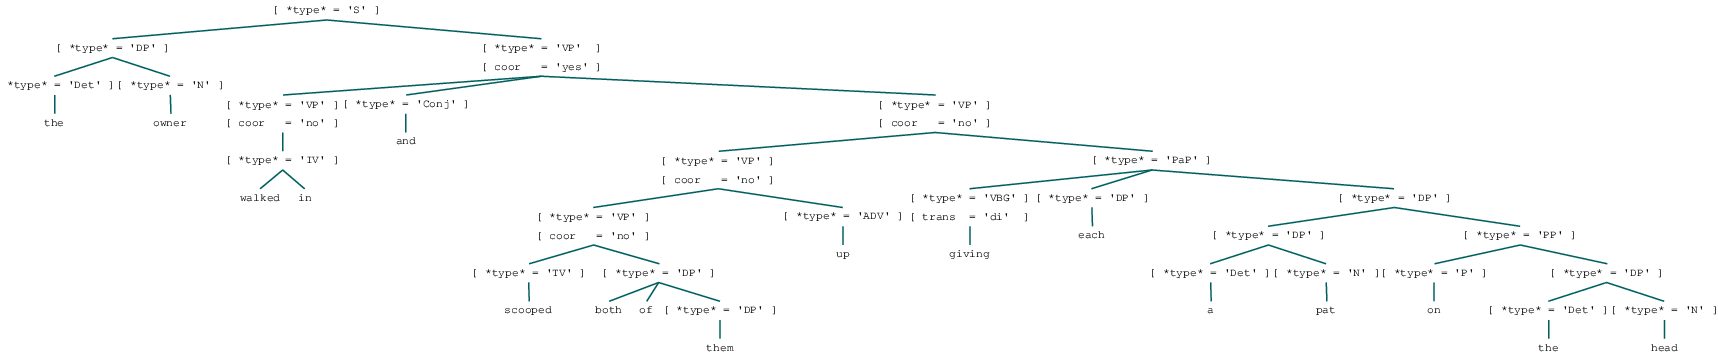

In [497]:
s9 = 'the owner walked in and scooped both of them up giving each a pat on the head'
parse_and_display(s9, pr)

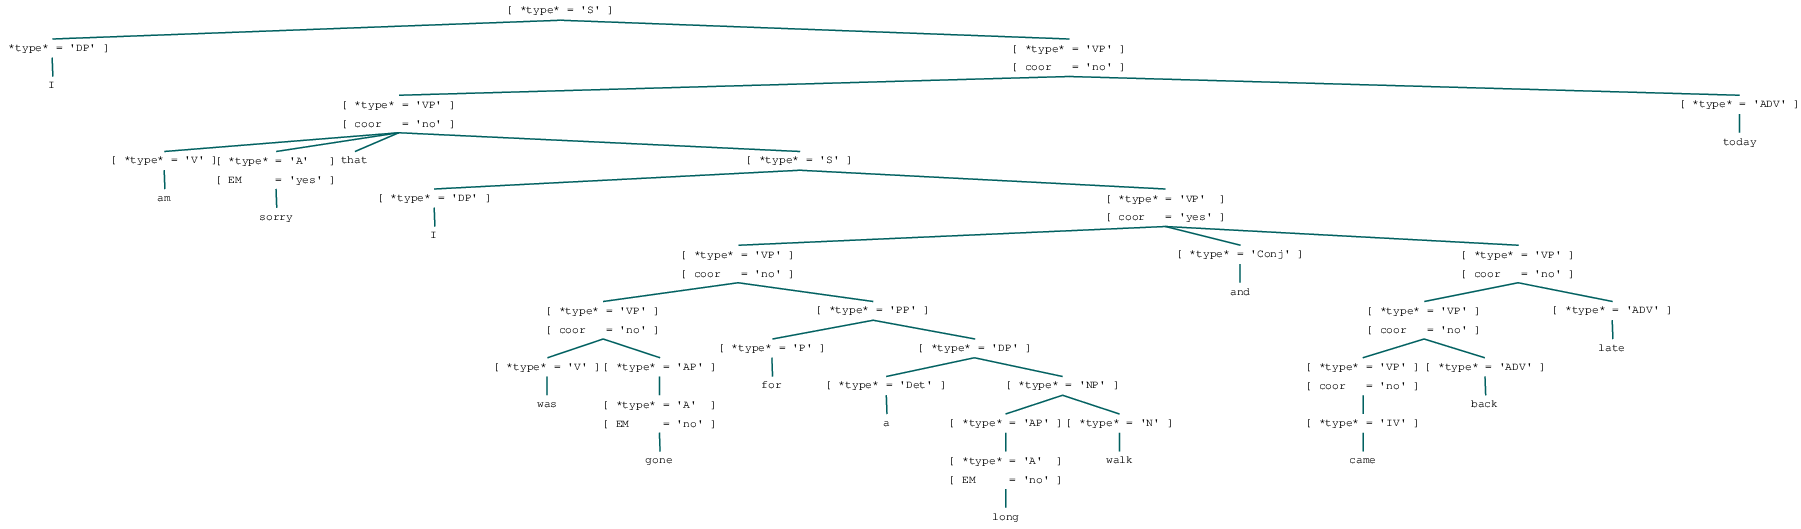

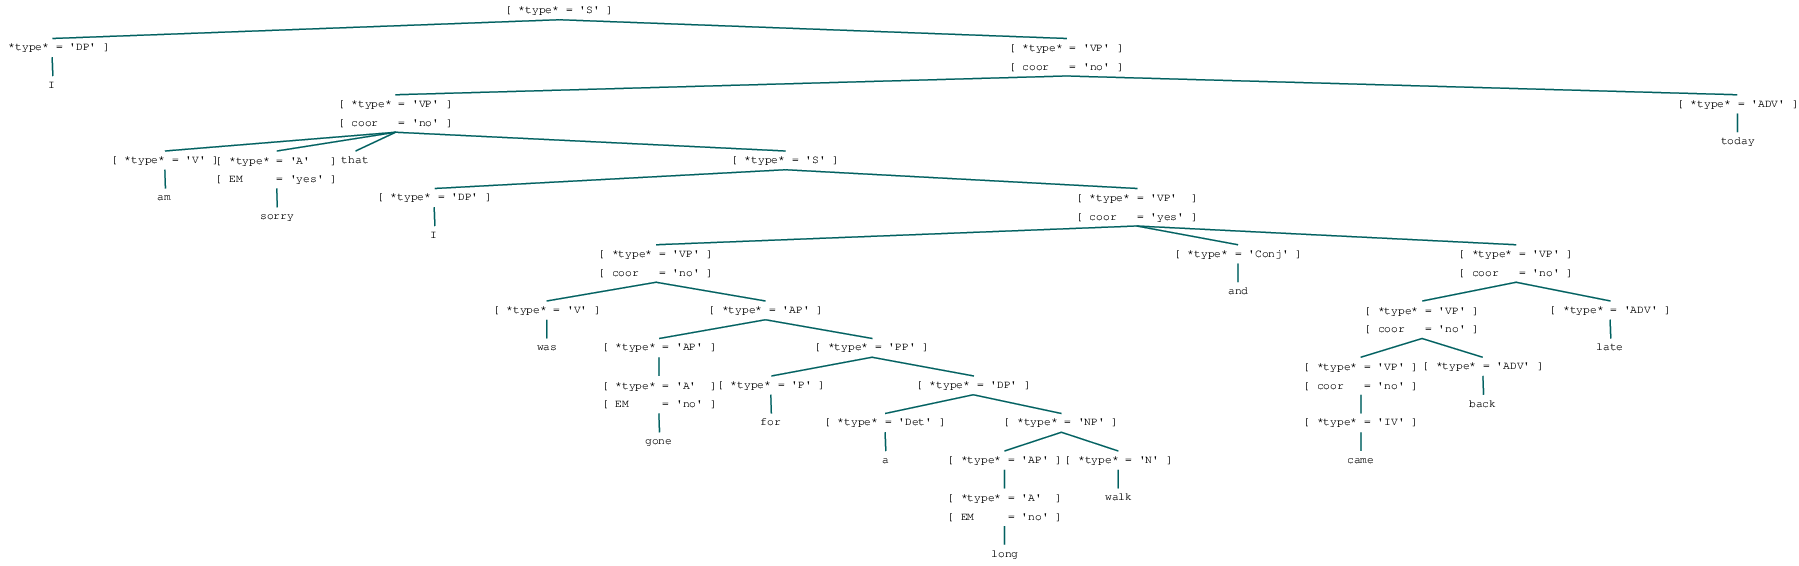

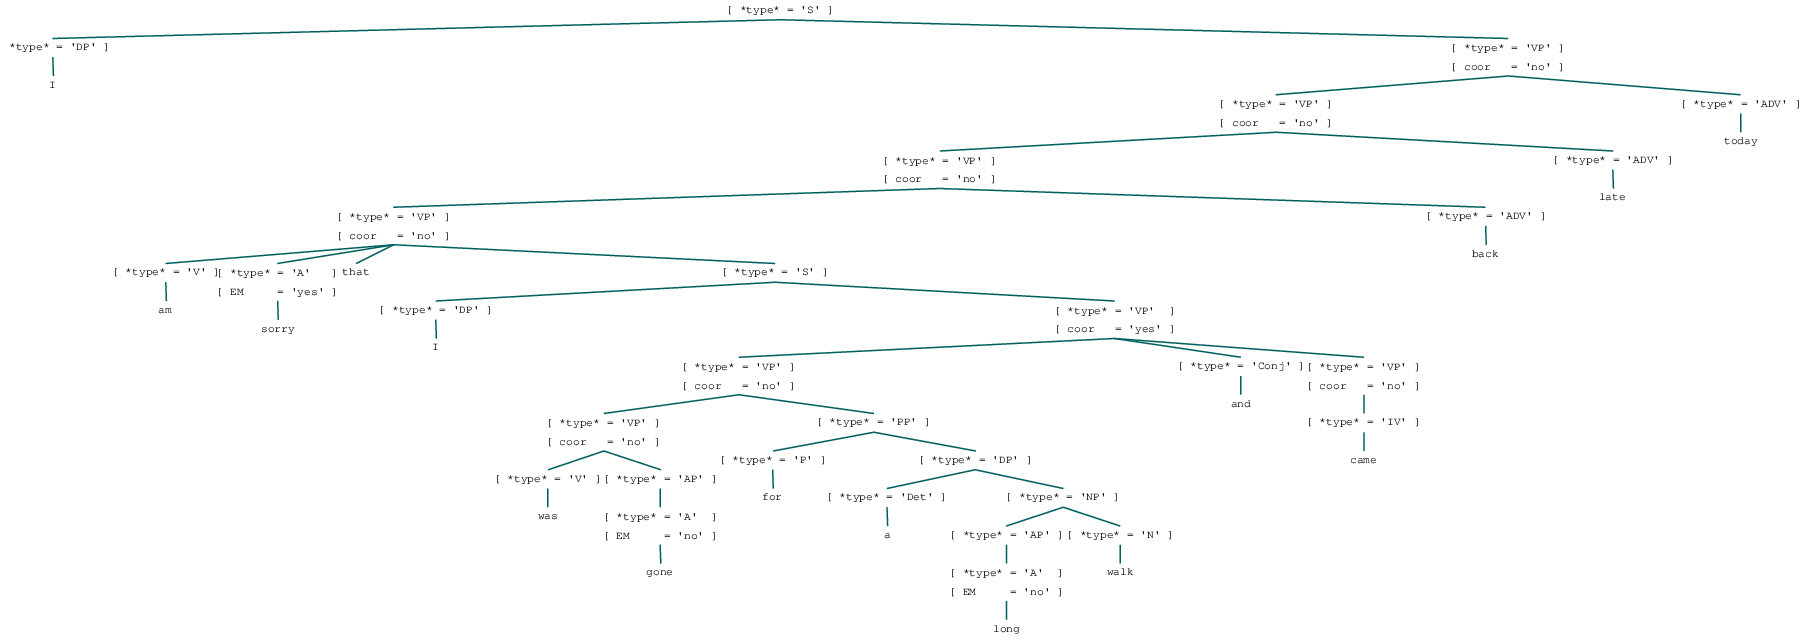

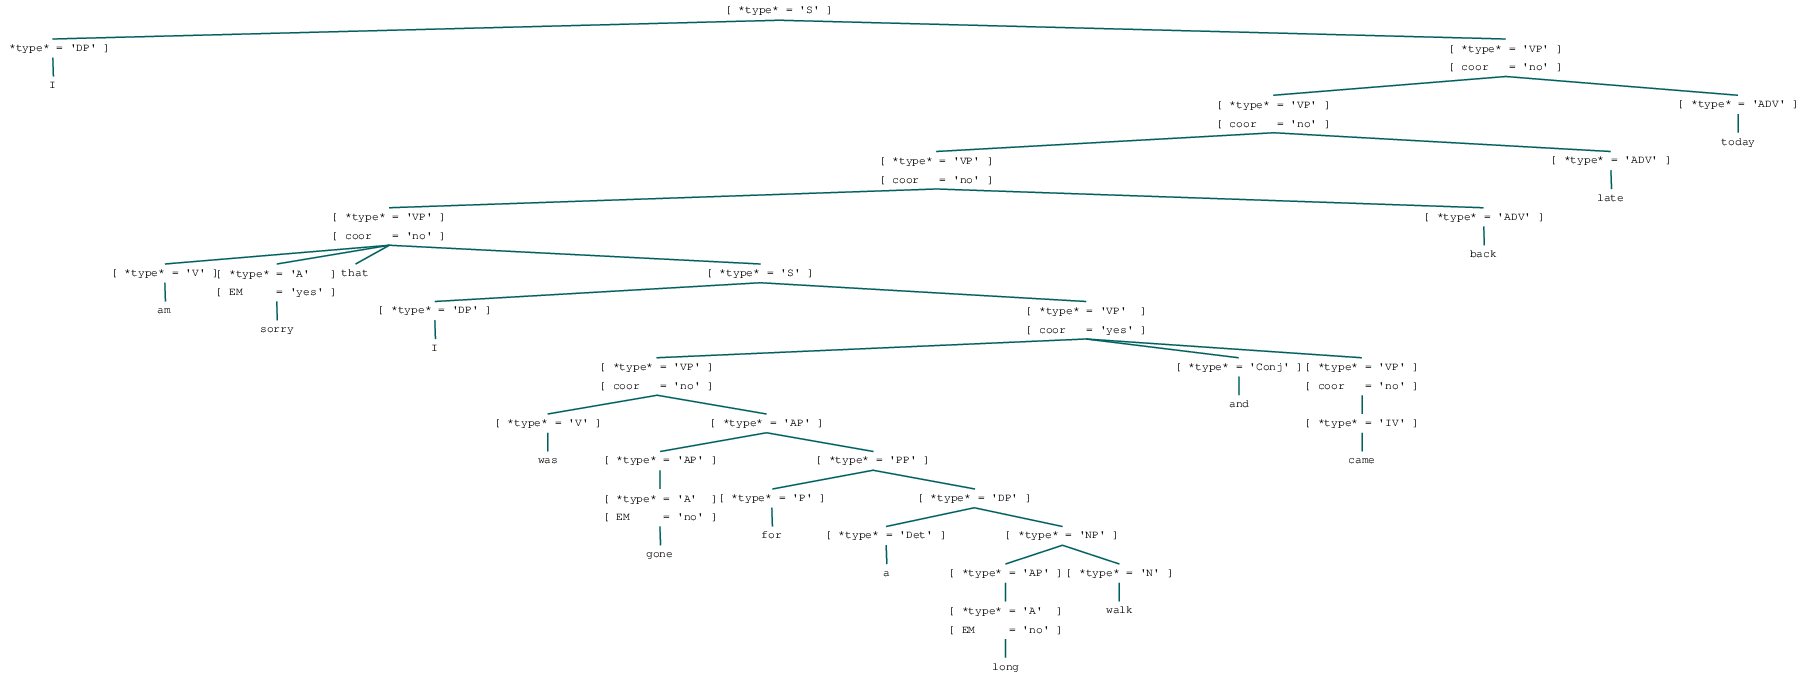

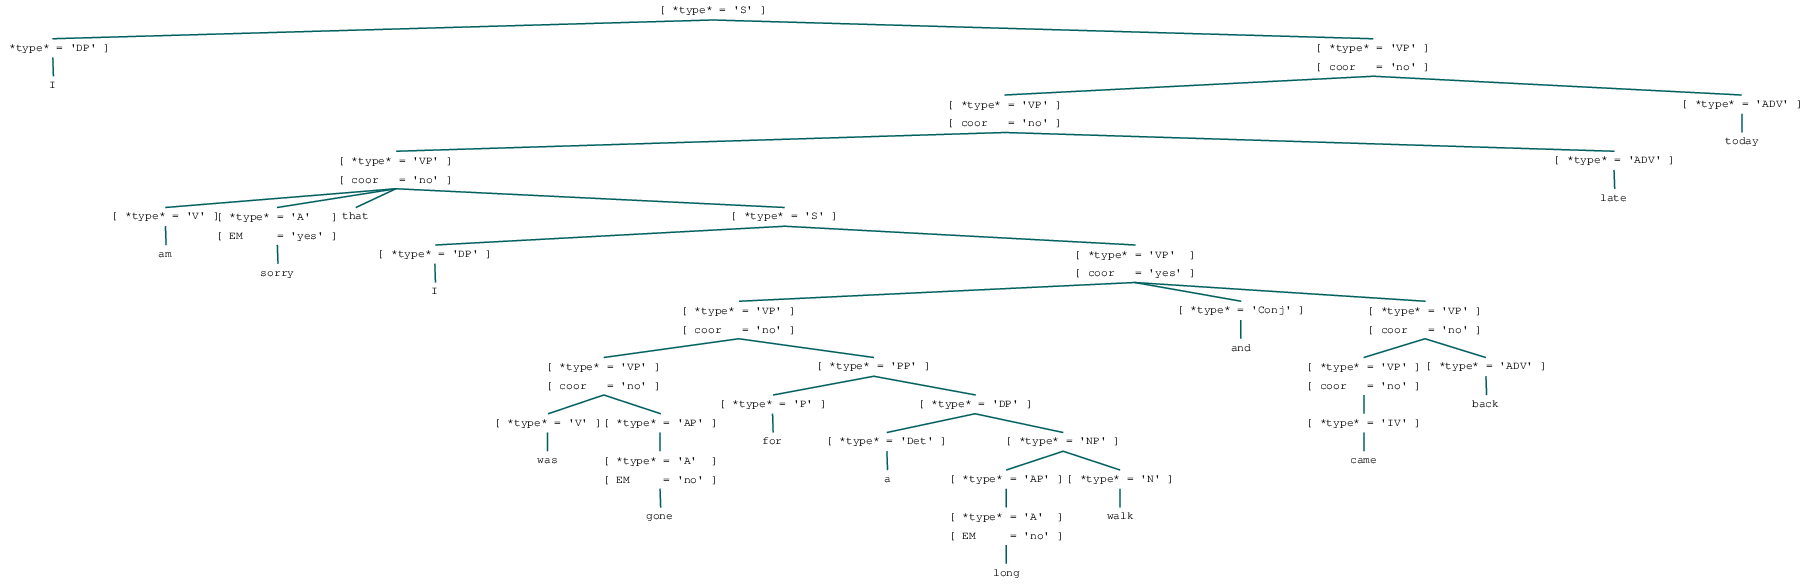

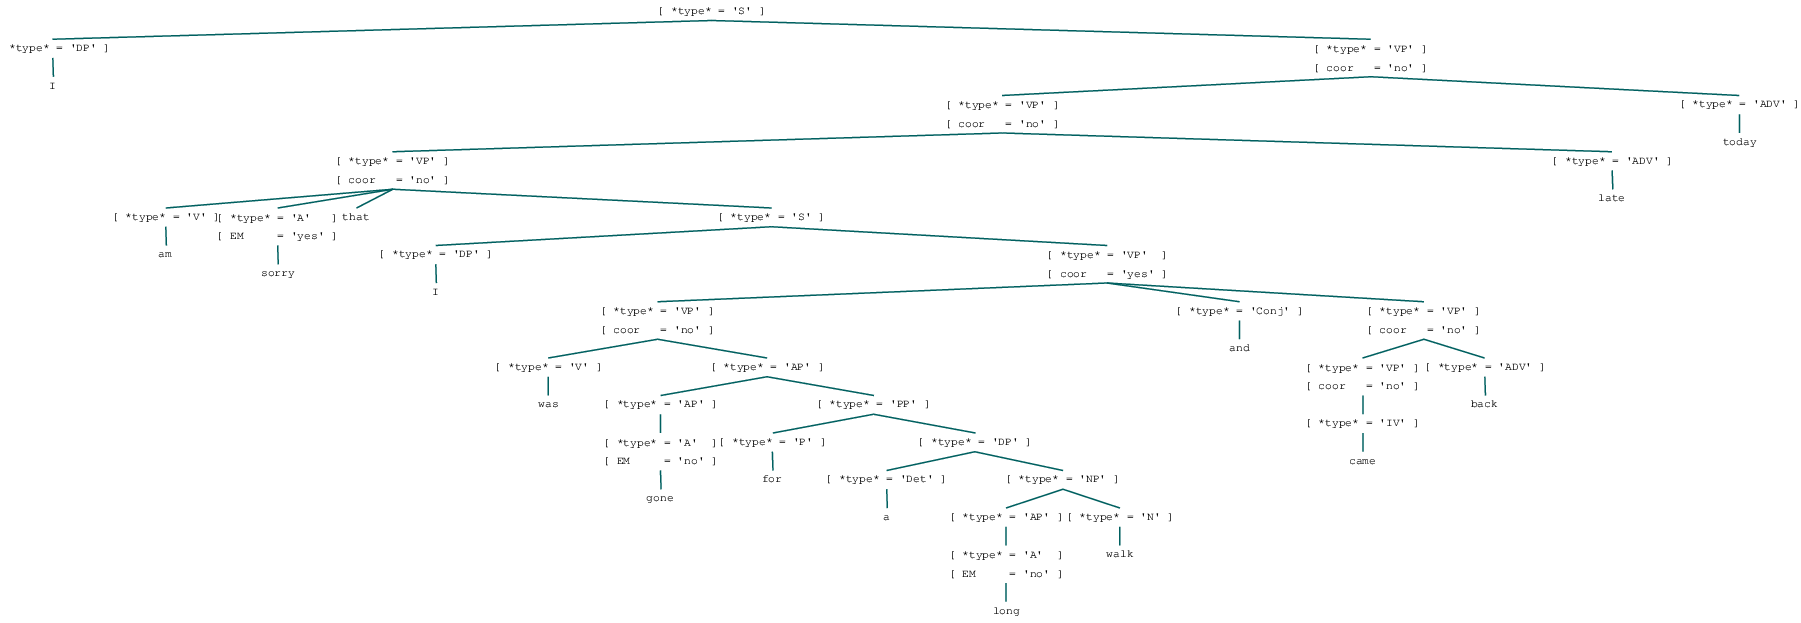

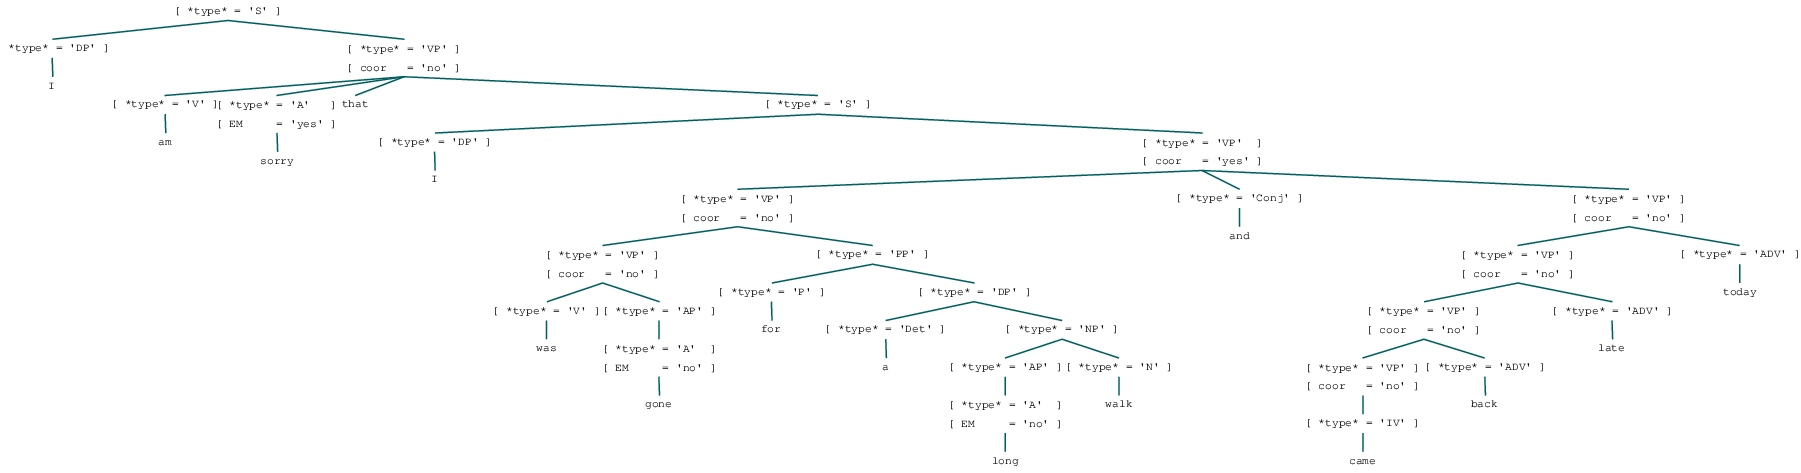

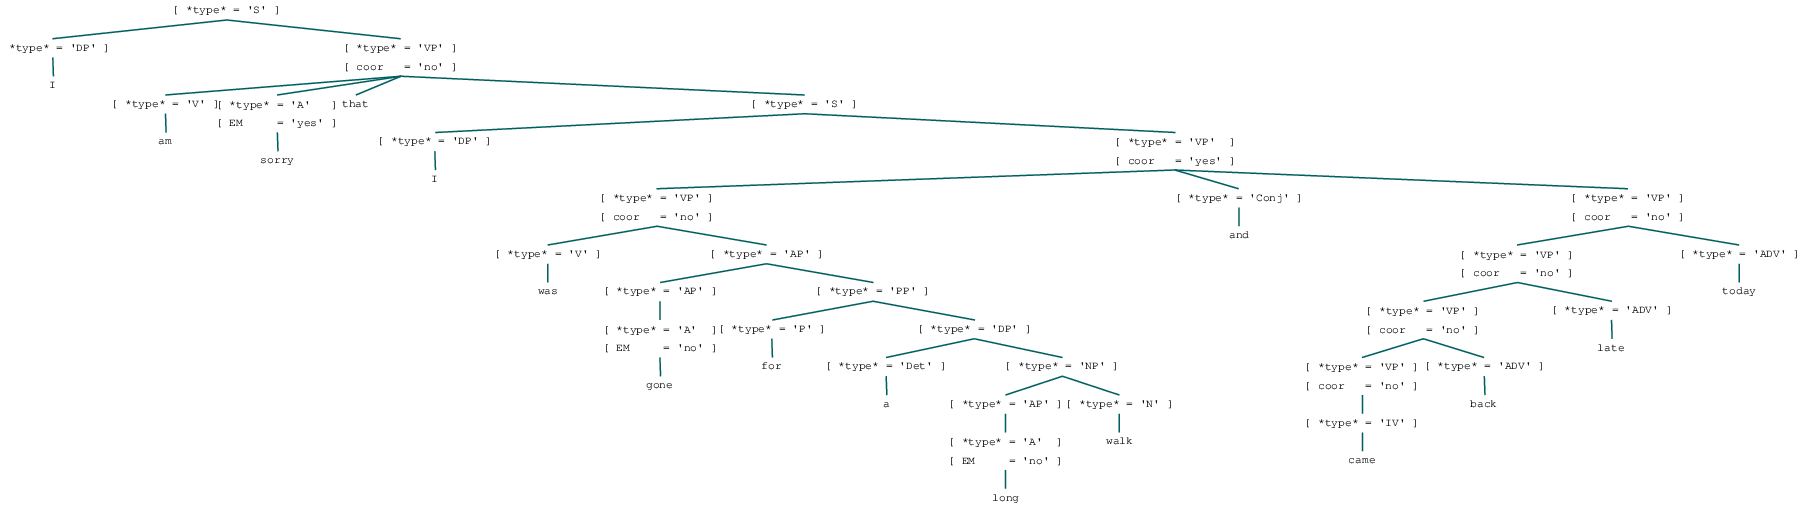

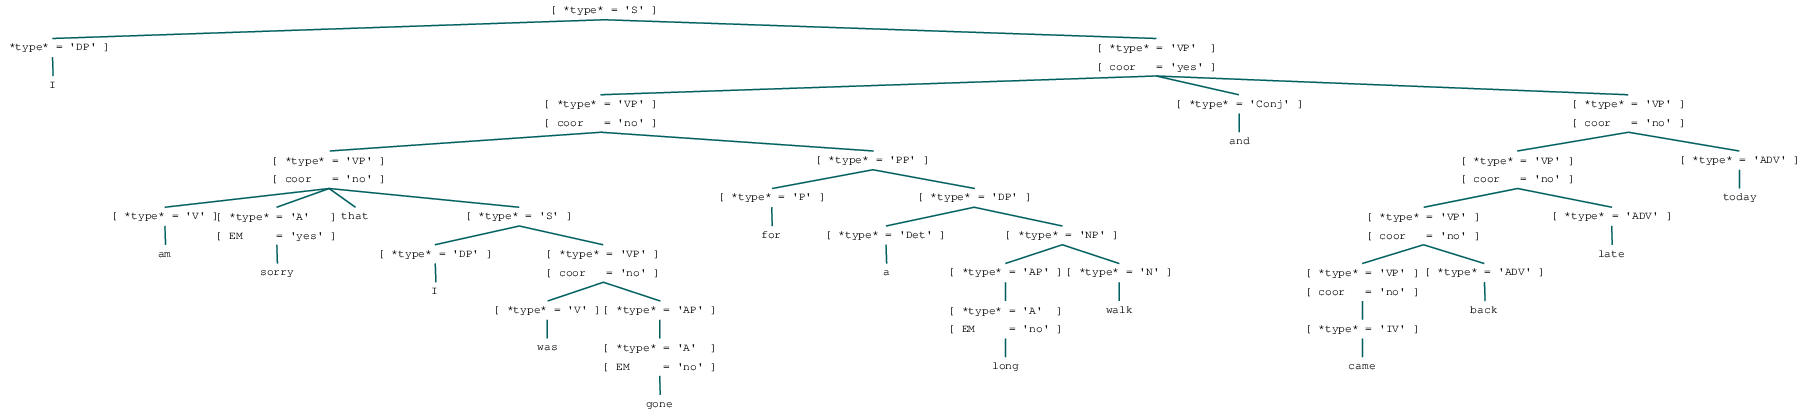

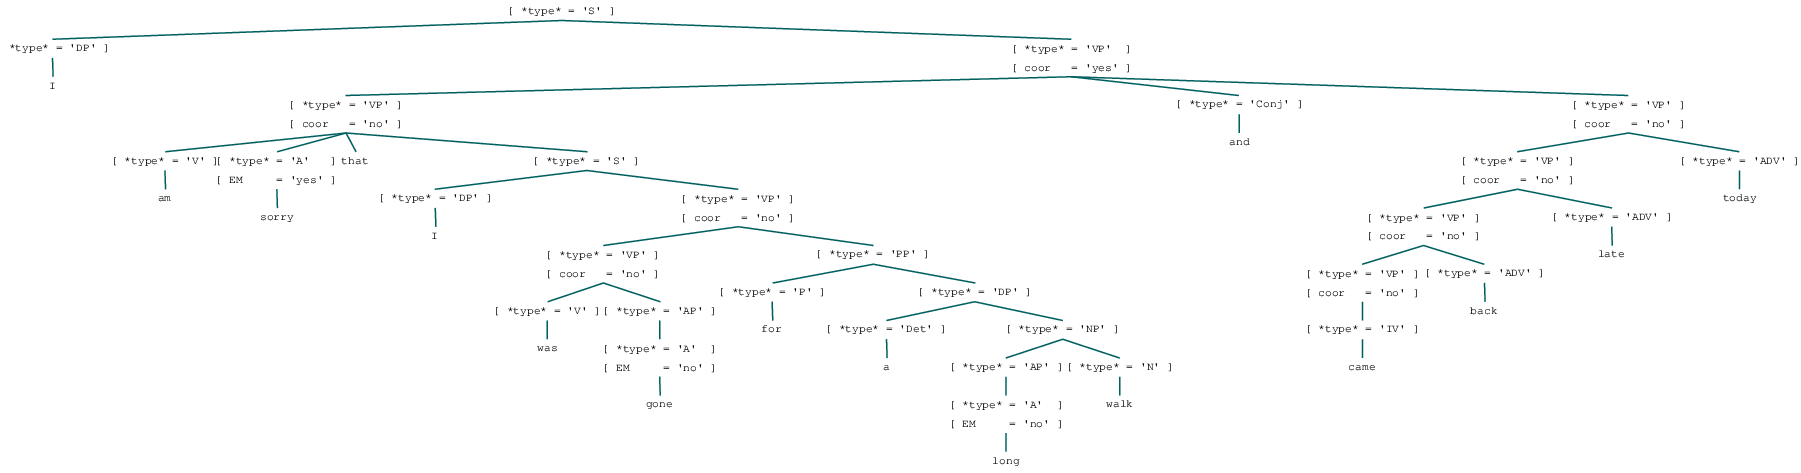

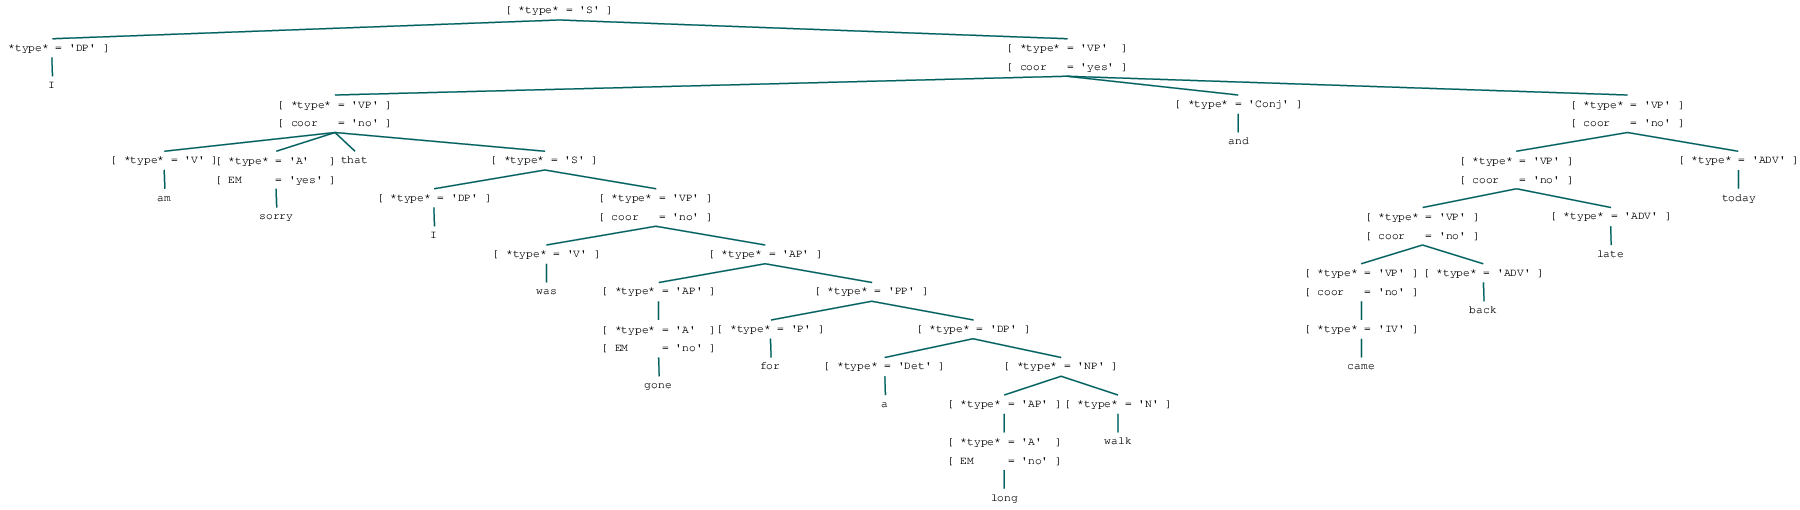

In [498]:
s10 = 'I am sorry that I was gone for a long walk and came back late today'
parse_and_display(s10, pr)

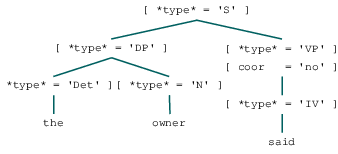

In [499]:
s11 = 'the owner said'
parse_and_display(s11, pr)

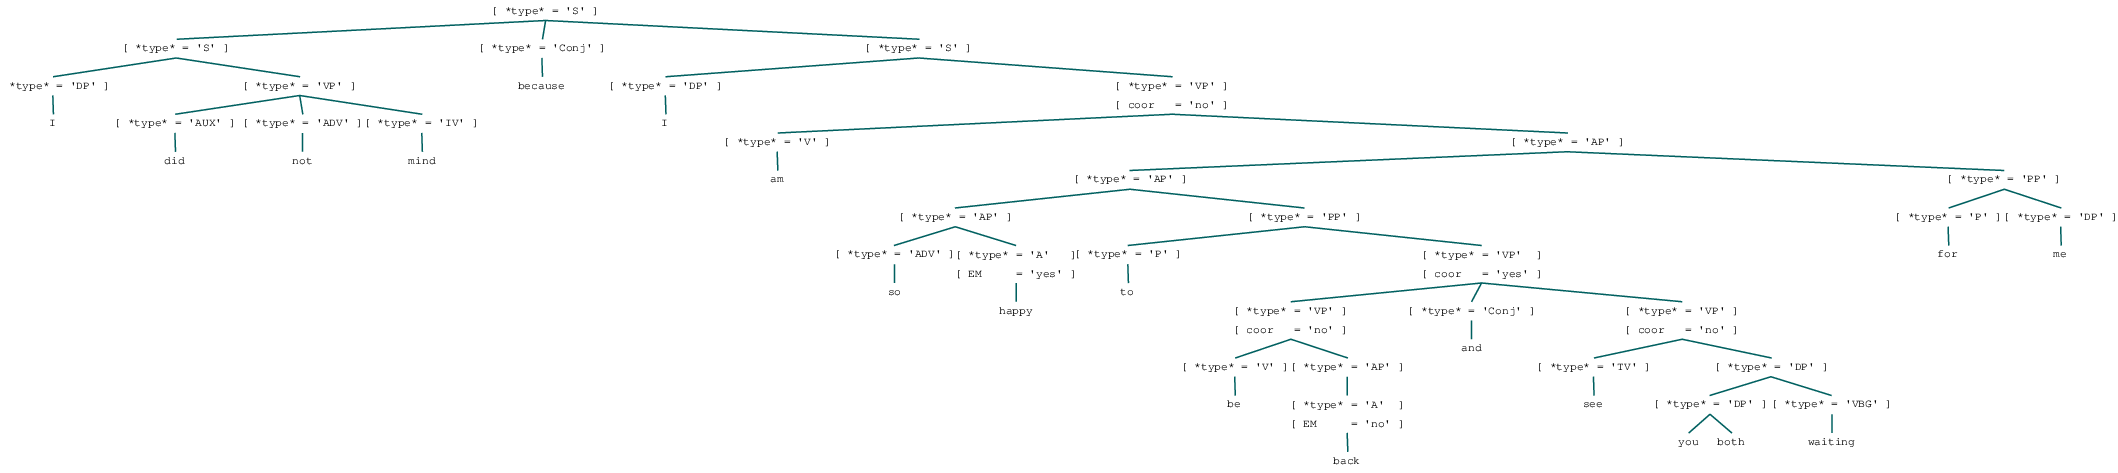

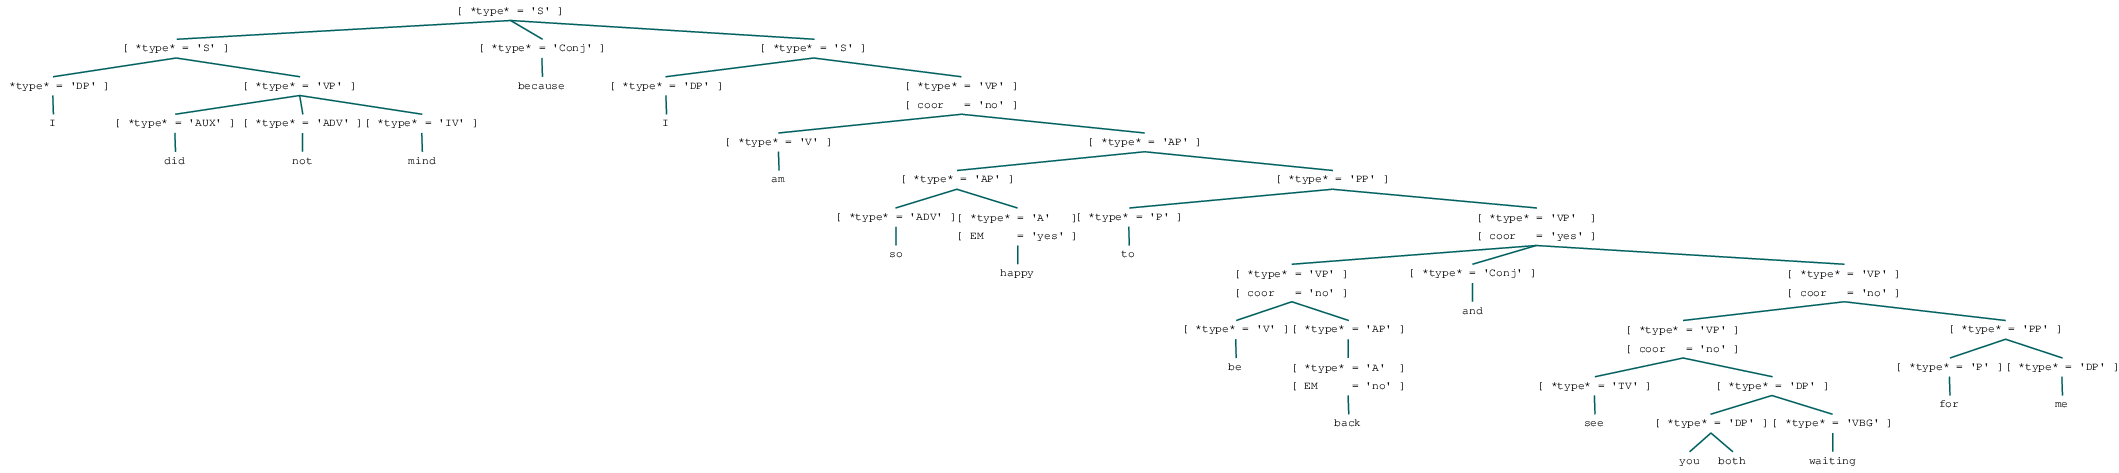

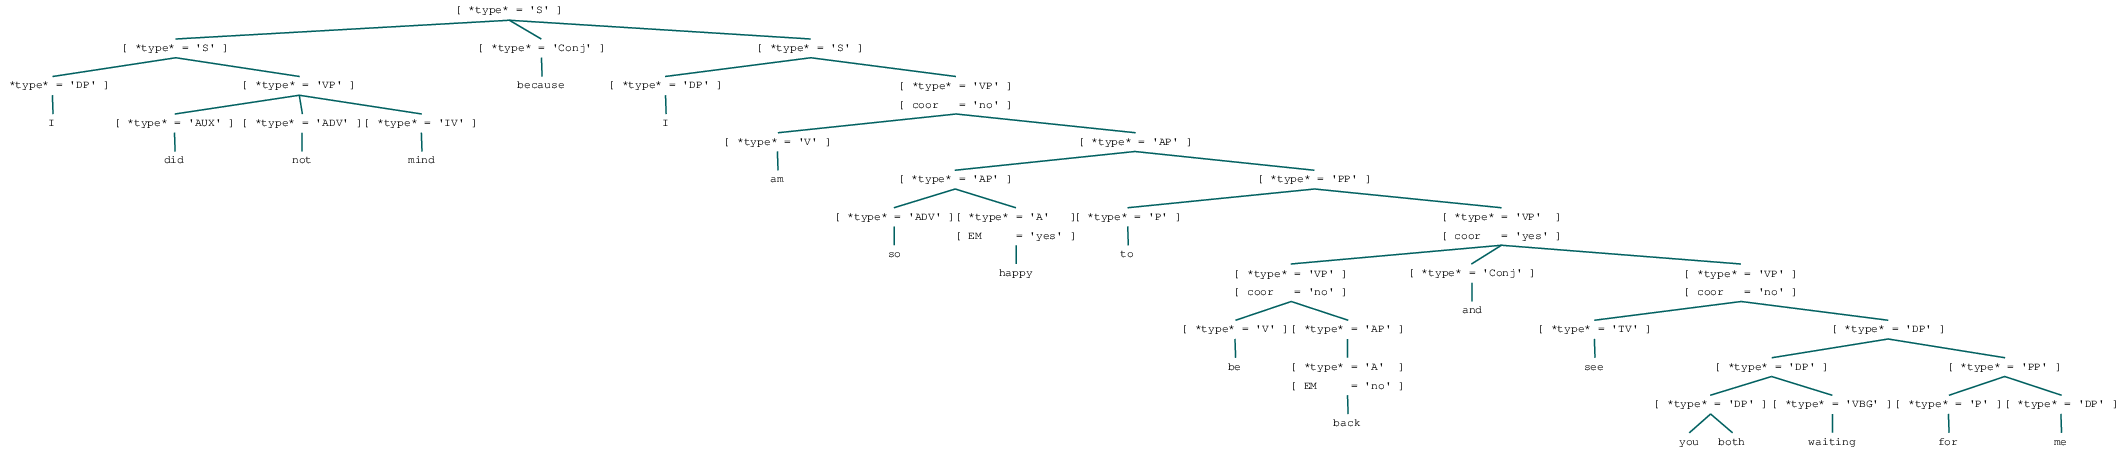

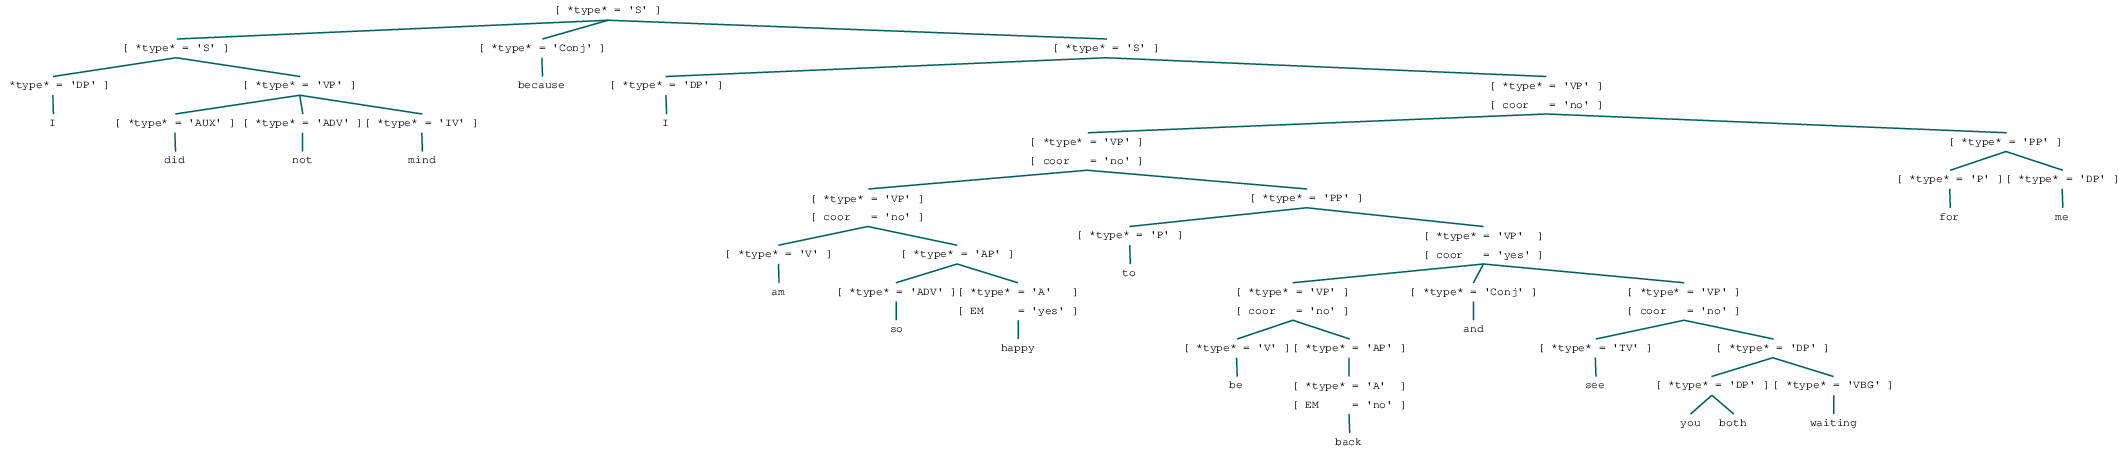

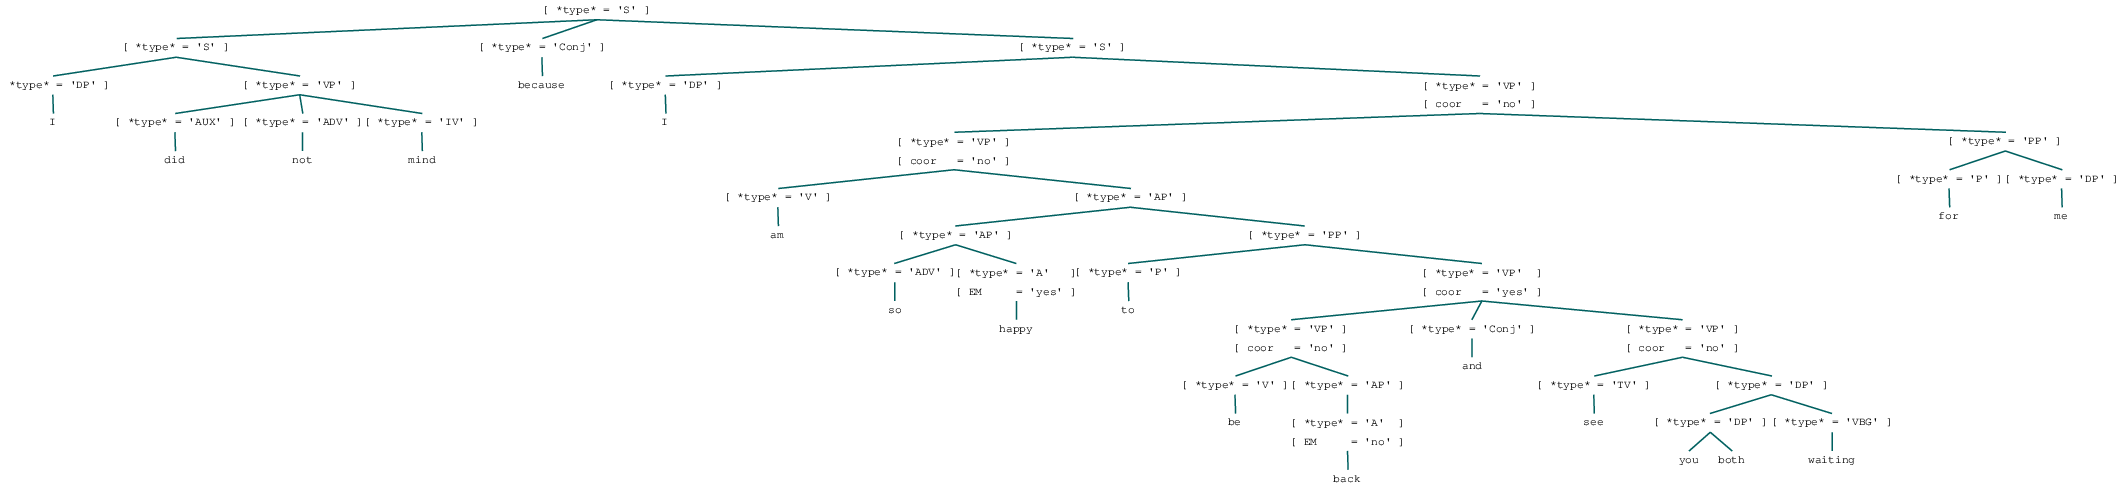

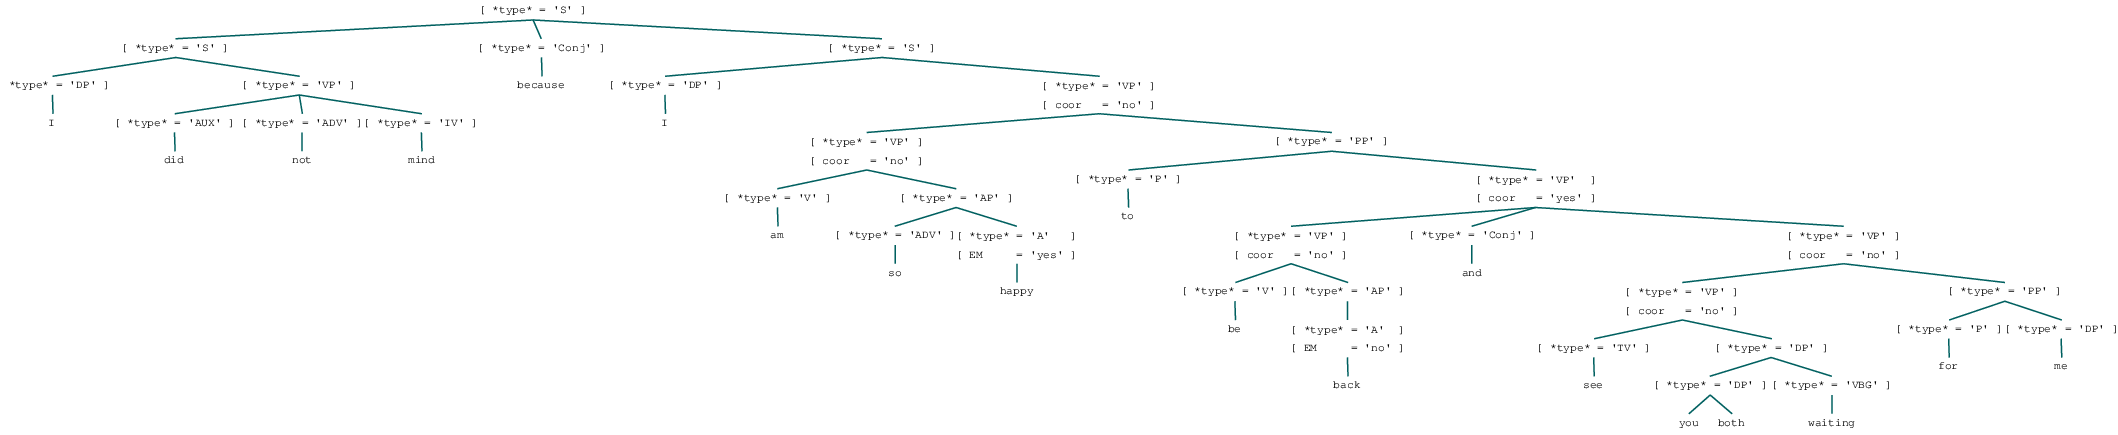

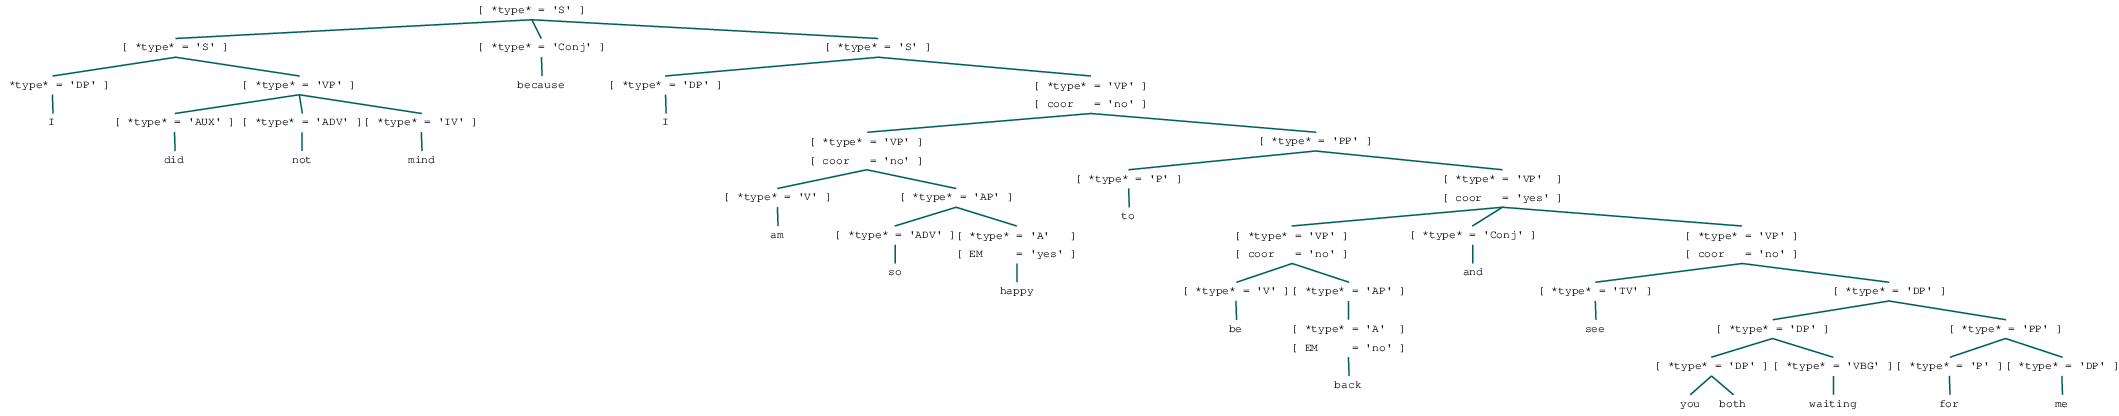

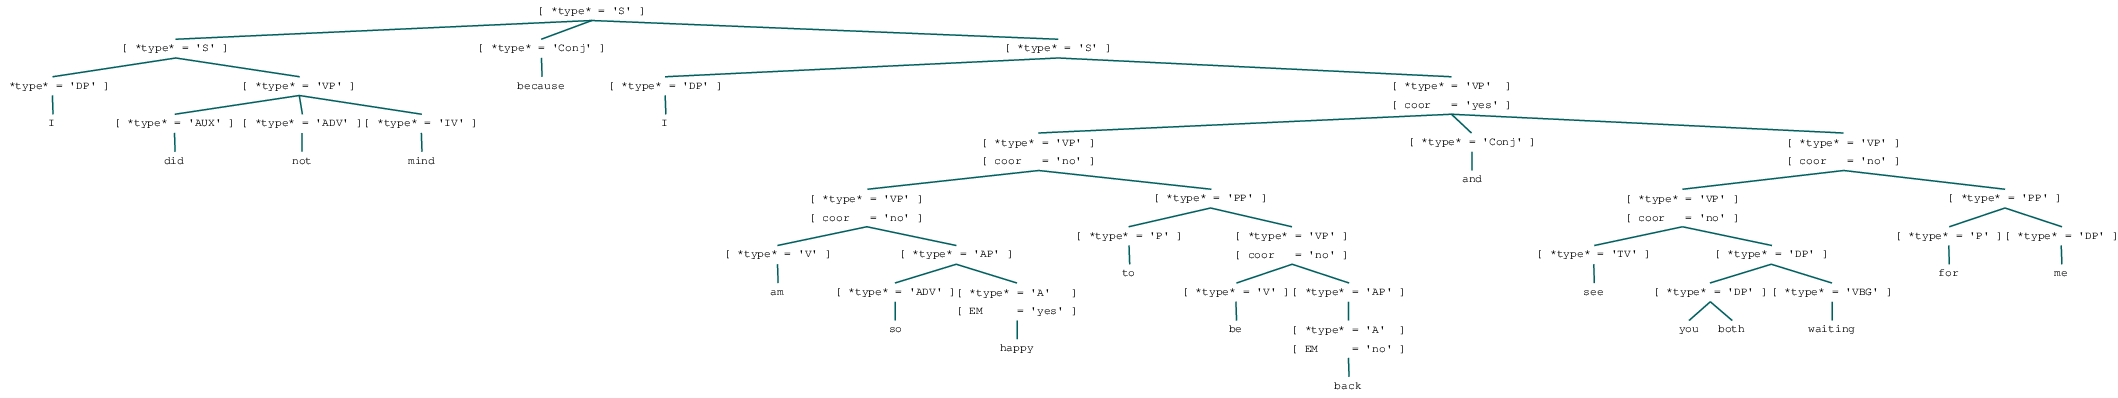

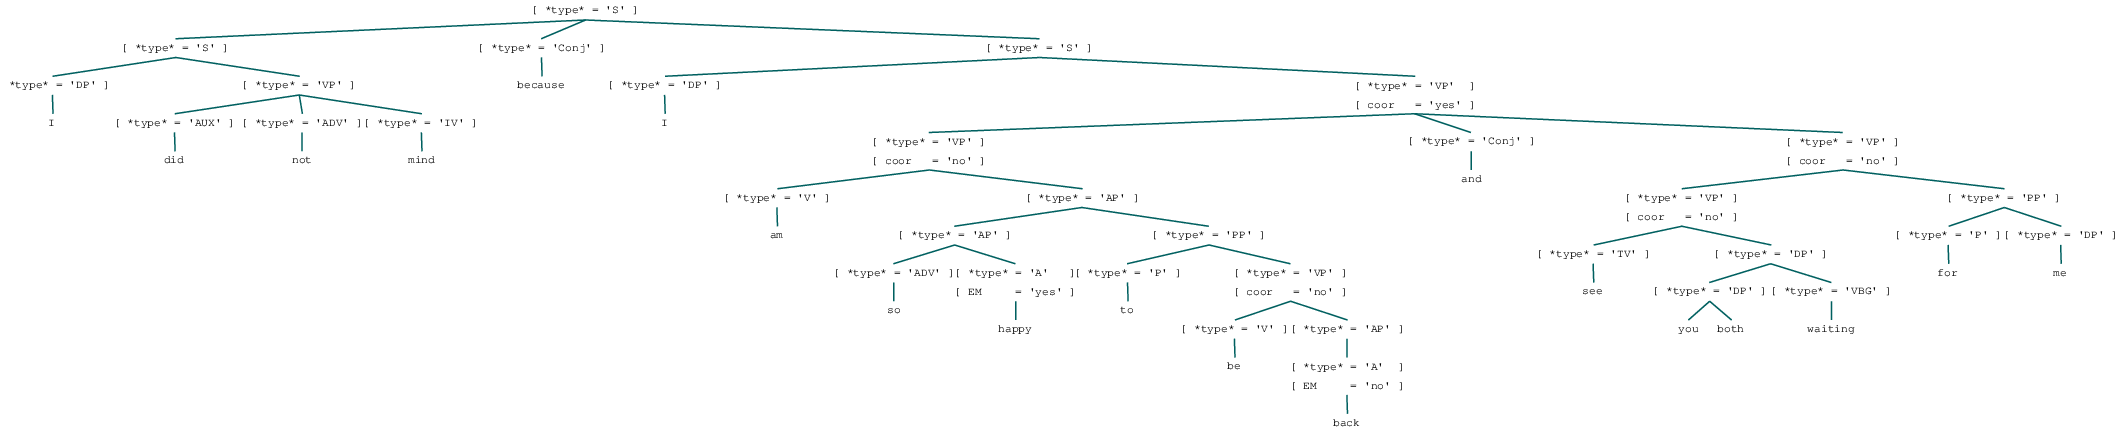

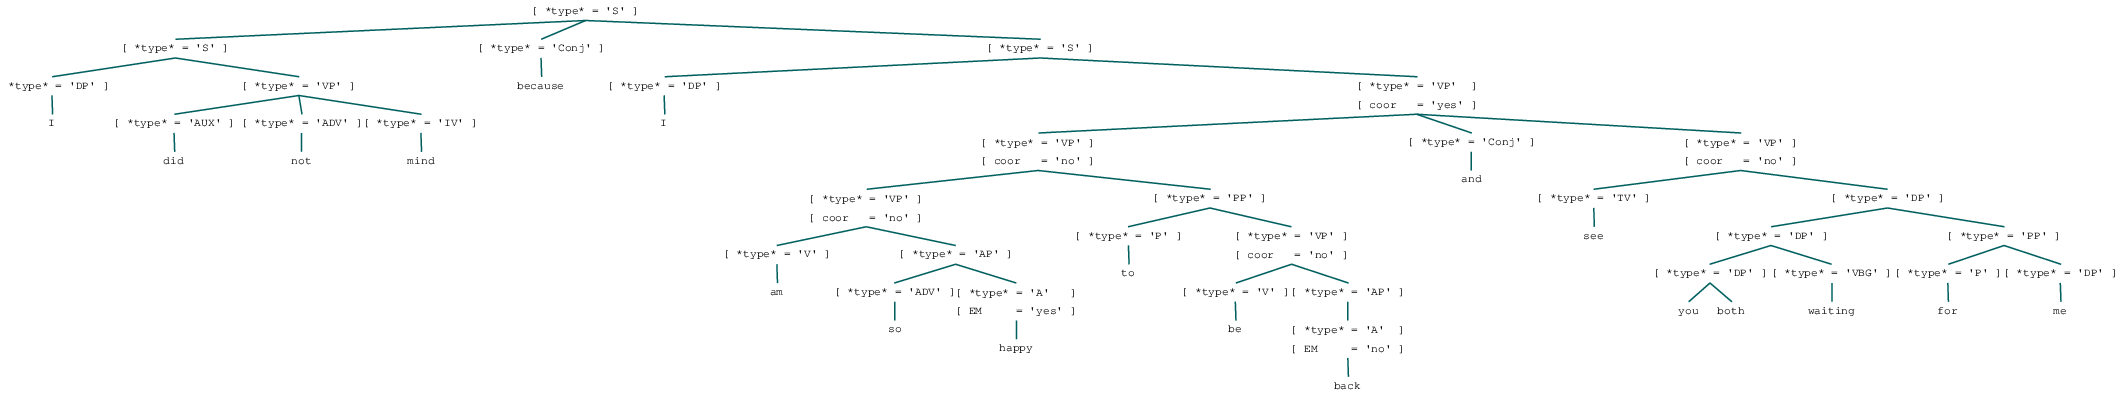

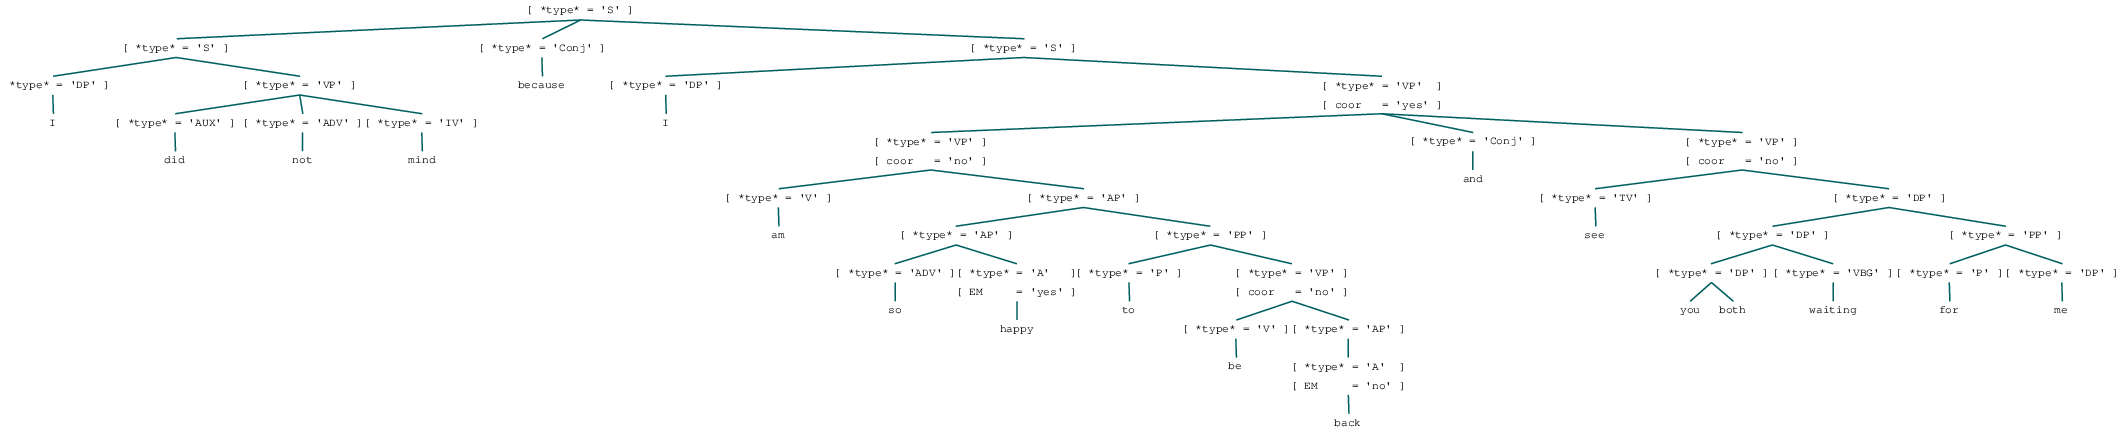

In [502]:
s12 = "I did not mind because I am so happy to be back and see you both waiting for me"
parse_and_display(s12, pr)

## Short Story 2:
The dog ran home. The cat followed. They arrived. The house was empty. The dog whined. The cat meowed. They searched every room. There was no sign of the owner. Feeling worried, they decided to sit by the door. Hours passed. The sun began to set. They heard the sound of a car pulling into the driveway. They rushed. They wagged their tails. The cat was meowing excitedly. The owner walked in and scooped them up. The owner gave them a pat on the head. "I am sorry that I was gone for a long walk," the owner said. "I am back and so happy to see you both."


In [569]:
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)

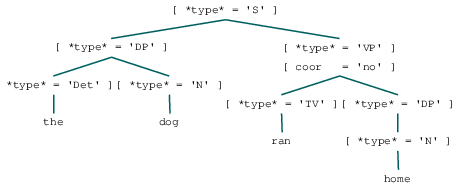

In [570]:
s1 = 'the dog ran home'
parse_and_display(s1, pr)

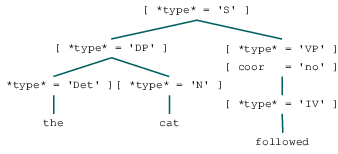

In [571]:
s2 = 'the cat followed'
parse_and_display(s2, pr)

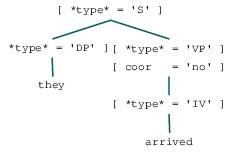

In [572]:
s3 = 'they arrived'
parse_and_display(s3, pr)

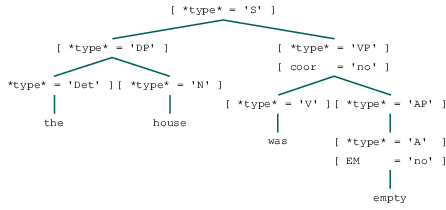

In [573]:
s4 = 'the house was empty'
parse_and_display(s4, pr)

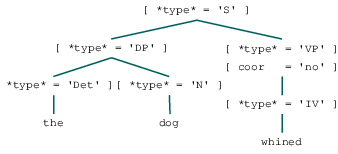

In [574]:
s5 = 'the dog whined'
parse_and_display(s5, pr)

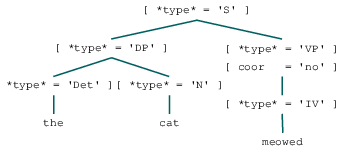

In [575]:
s6 = 'the cat meowed'
parse_and_display(s6, pr)

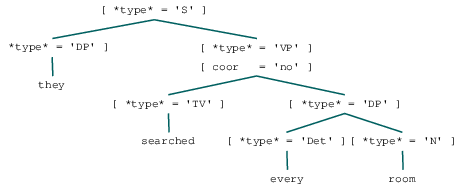

In [576]:
s7 = 'they searched every room'
parse_and_display(s7, pr)

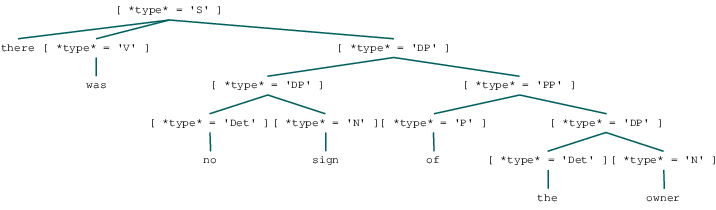

In [577]:
s8 = 'there was no sign of the owner'
parse_and_display(s8, pr)

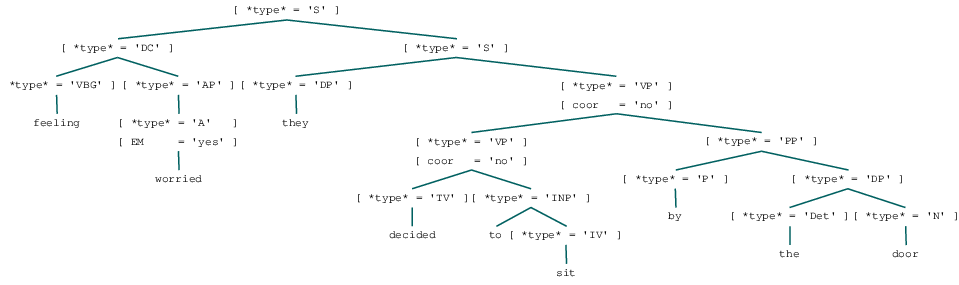

In [578]:
s9 = 'feeling worried they decided to sit by the door'
parse_and_display(s9, pr)

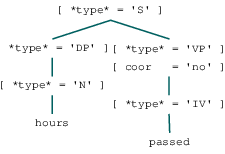

In [579]:
s10 = 'hours passed'
parse_and_display(s10, pr)

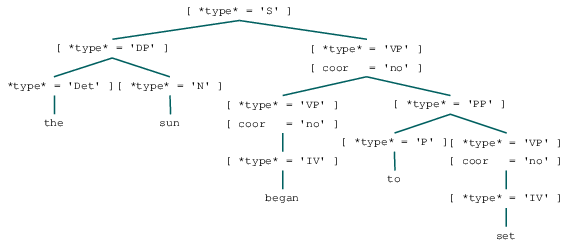

In [580]:
s11 = 'the sun began to set'
parse_and_display(s11, pr)

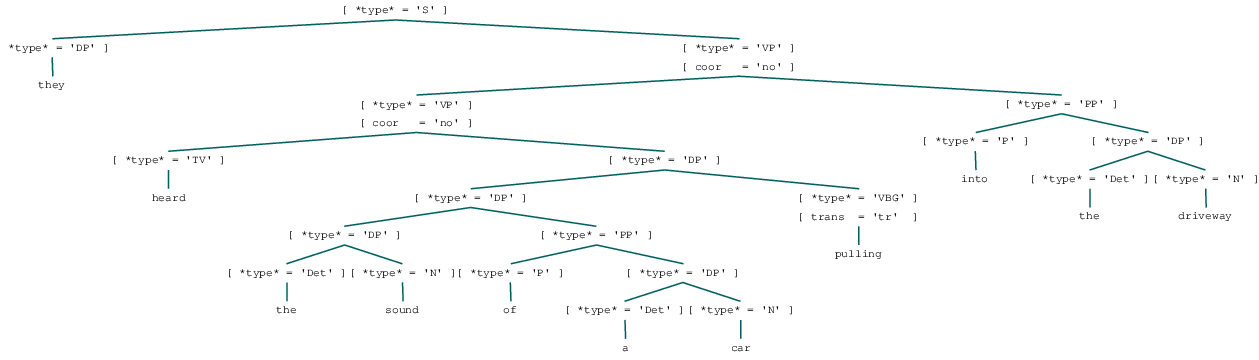

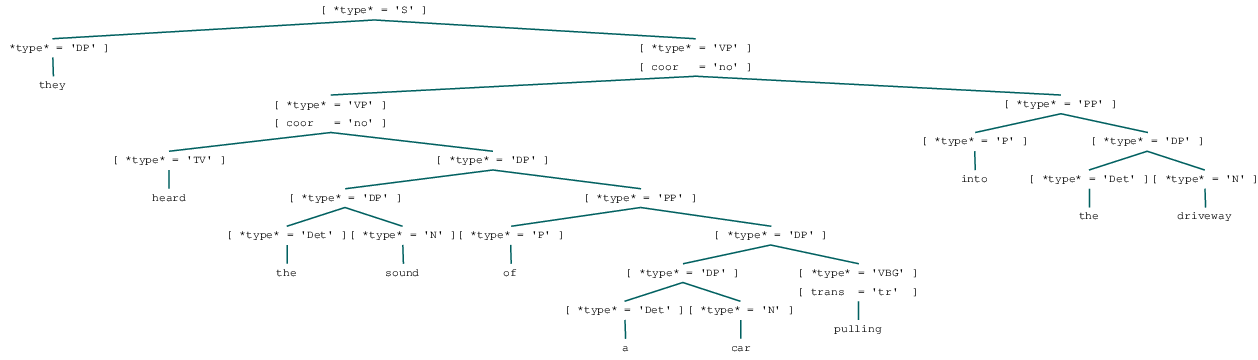

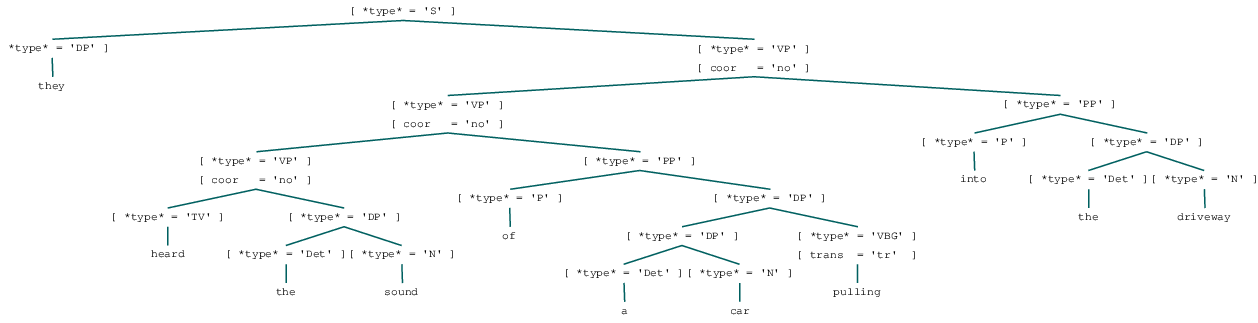

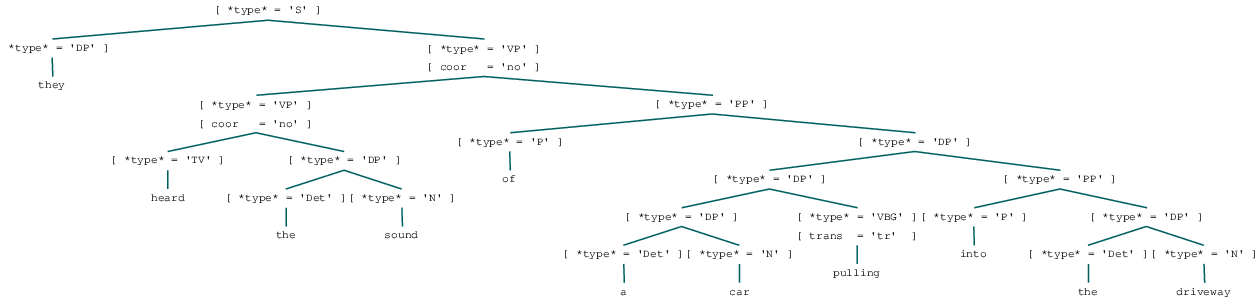

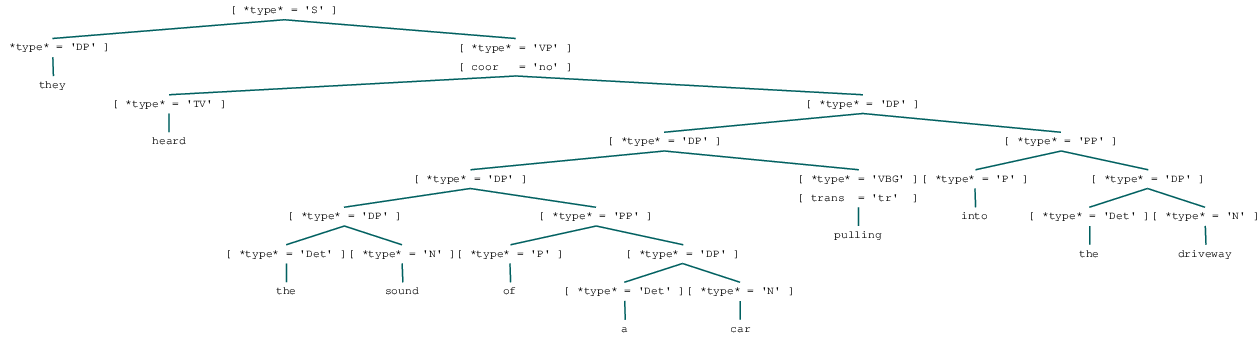

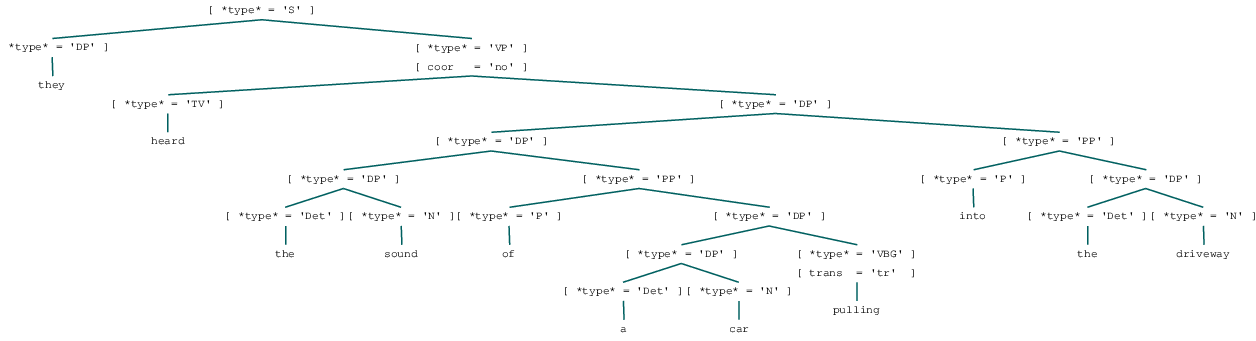

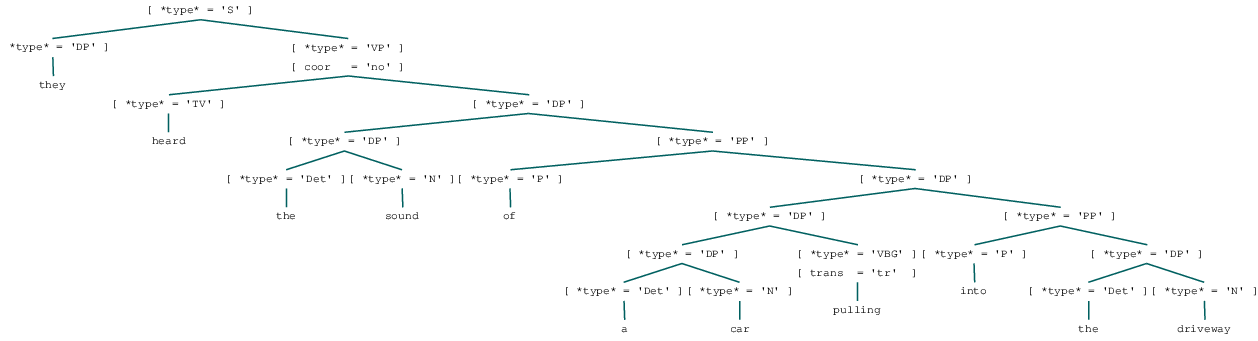

In [581]:
s12 = 'they heard the sound of a car pulling into the driveway'
parse_and_display(s12, pr)

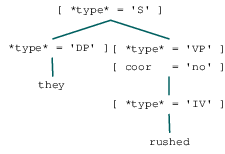

In [582]:
s13 = 'they rushed'
parse_and_display(s13, pr)

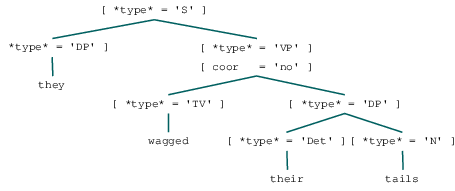

In [583]:
s14 = 'they wagged their tails'
parse_and_display(s14, pr)

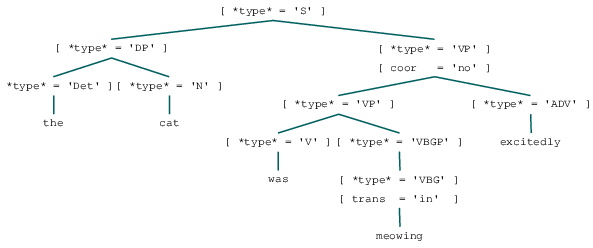

In [584]:
s15 = 'the cat was meowing excitedly'
parse_and_display(s15, pr)

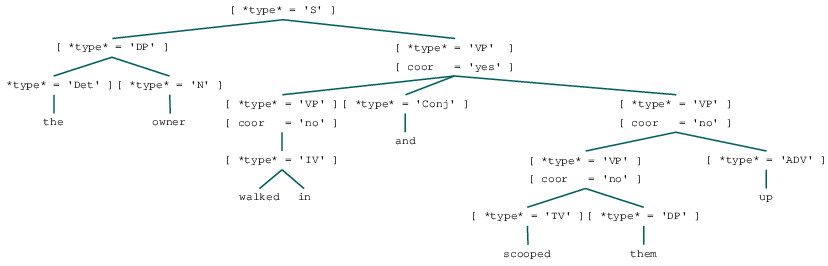

In [585]:
s16 = 'the owner walked in and scooped them up'
parse_and_display(s16, pr)

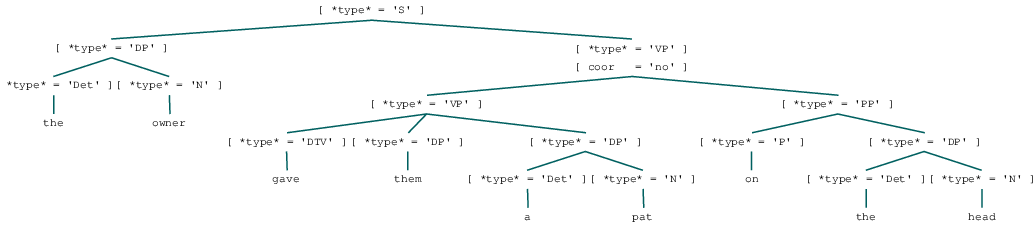

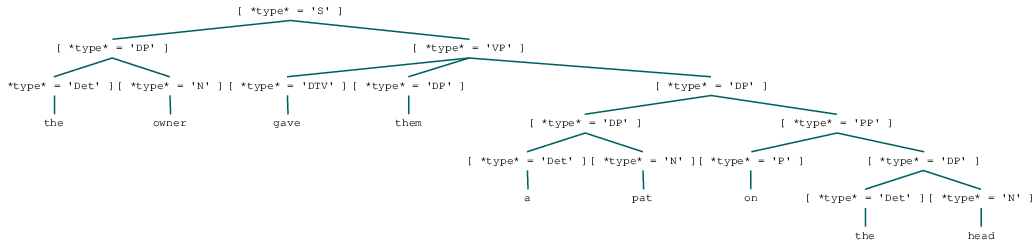

In [586]:
s17 = 'the owner gave them a pat on the head'
parse_and_display(s17, pr)

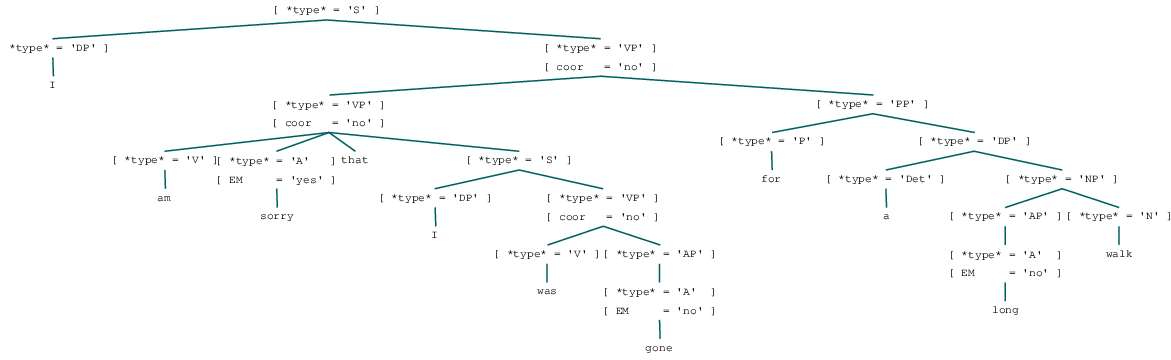

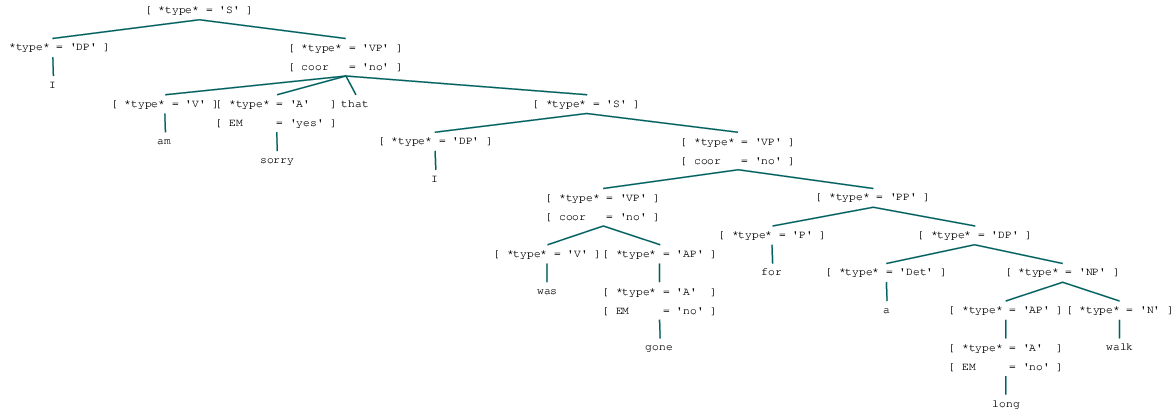

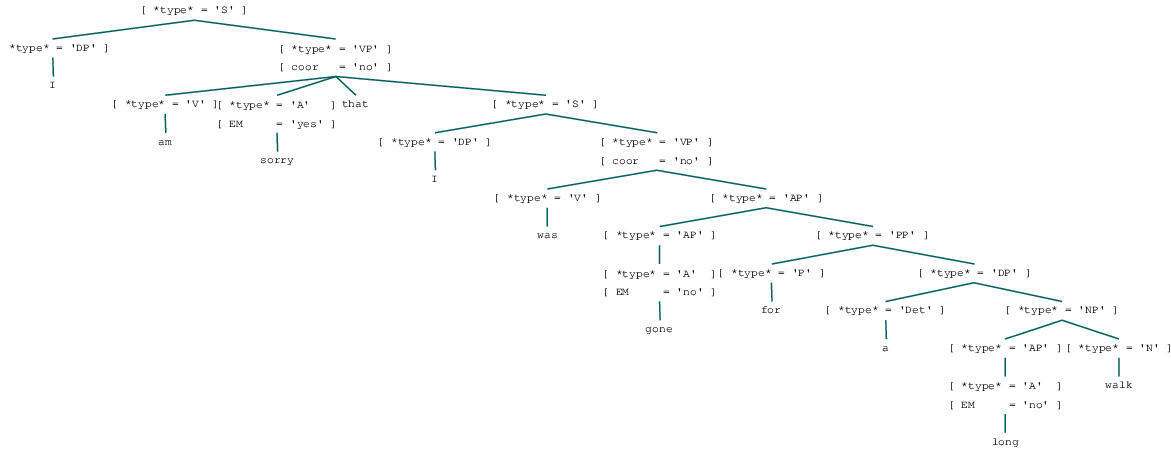

In [587]:
s18 = 'I am sorry that I was gone for a long walk'
parse_and_display(s18, pr)

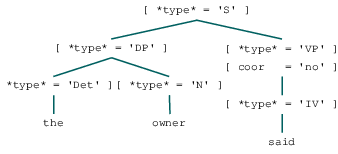

In [588]:
s19 = 'the owner said'
parse_and_display(s19, pr)

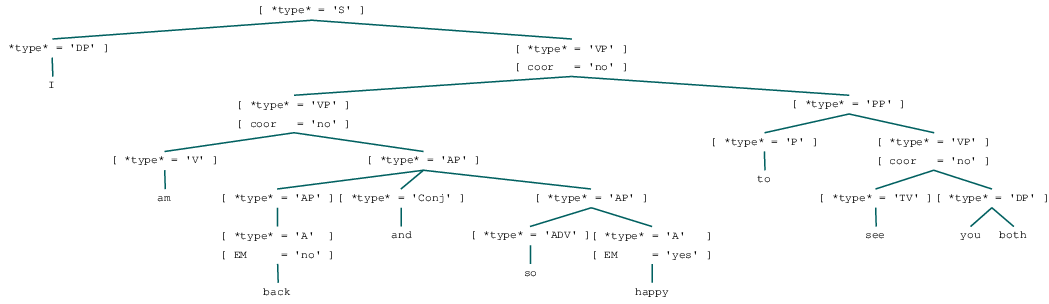

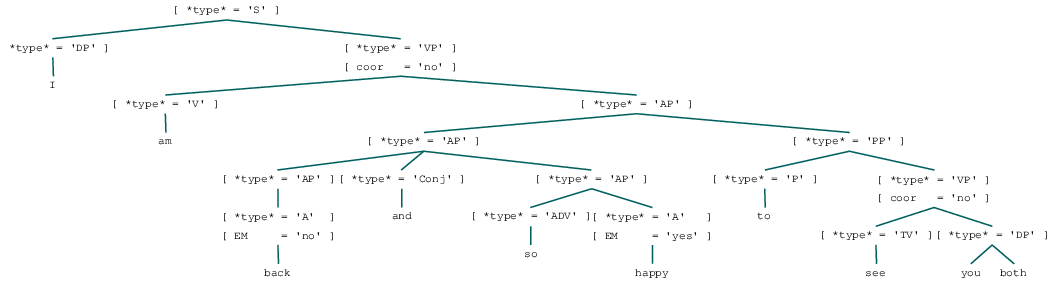

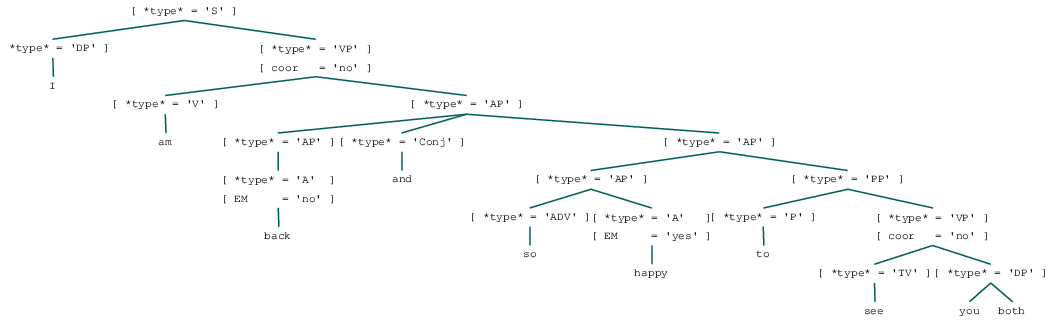

In [590]:
s20 = 'I am back and so happy to see you both'
parse_and_display(s20, pr)

## Short Story 3:
They searched every room, pulling curtains and drawers. They saw no sign of the owner. They were confused and worried, but they decided to sit and wait by the door. Hours passed and it was sunset. They heard a sound. A car was pulling into the driveway. They rushed wagging their tails to the door. The owner arrived, late but happily. They scooped the dog and cat, giving each a pat on the head. "Sorry for the wait," the owner said. The dog and cat meowed in response because they were happy to see their owner.


In [662]:
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)

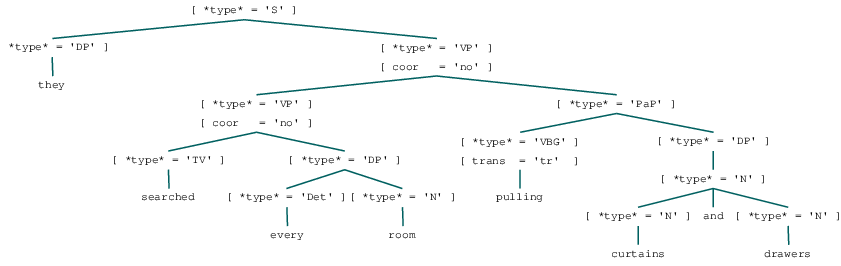

In [649]:
s1 = 'they searched every room pulling curtains and drawers'
parse_and_display(s1, pr)

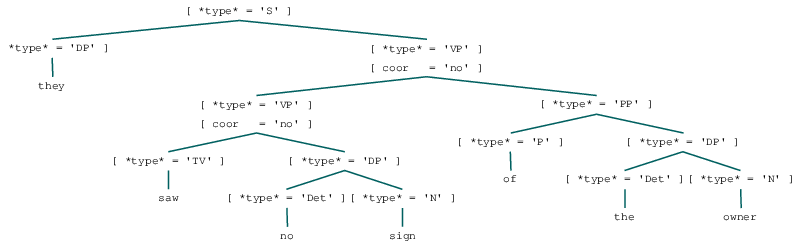

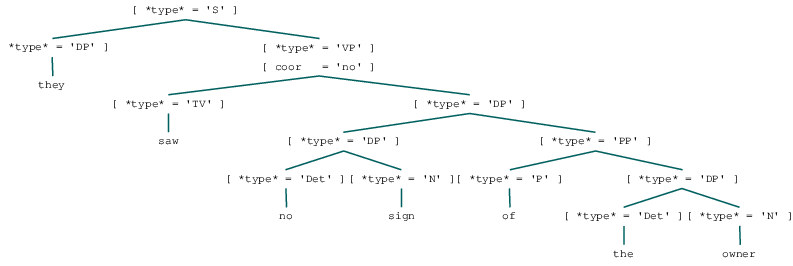

In [650]:
s2 = 'they saw no sign of the owner'
parse_and_display(s2, pr)

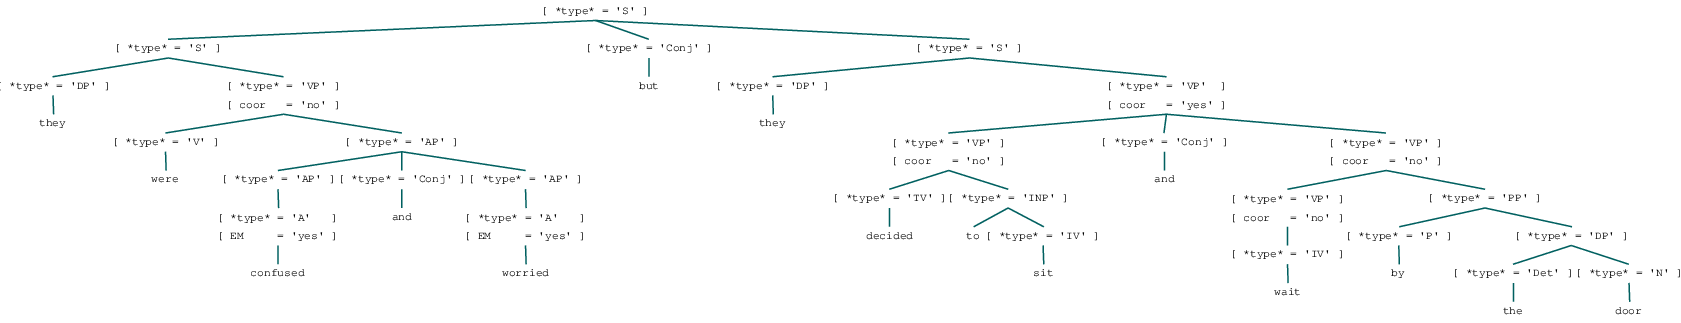

In [651]:
s3 = 'they were confused and worried but they decided to sit and wait by the door'
parse_and_display(s3, pr)

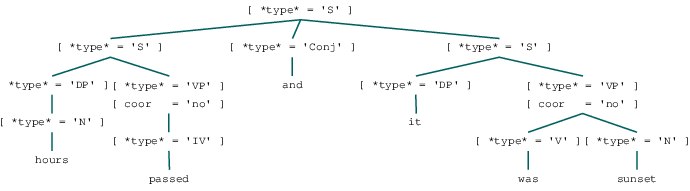

In [652]:
s4 = 'hours passed and it was sunset'
parse_and_display(s4, pr)

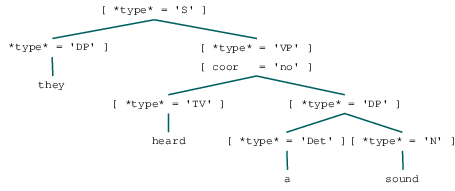

In [653]:
s5 = 'they heard a sound'
parse_and_display(s5, pr)

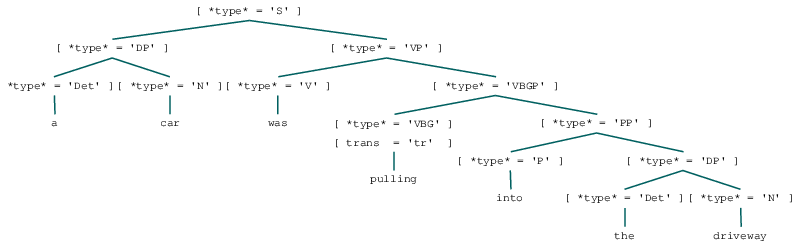

In [654]:
s6 = 'a car was pulling into the driveway'
parse_and_display(s6, pr)

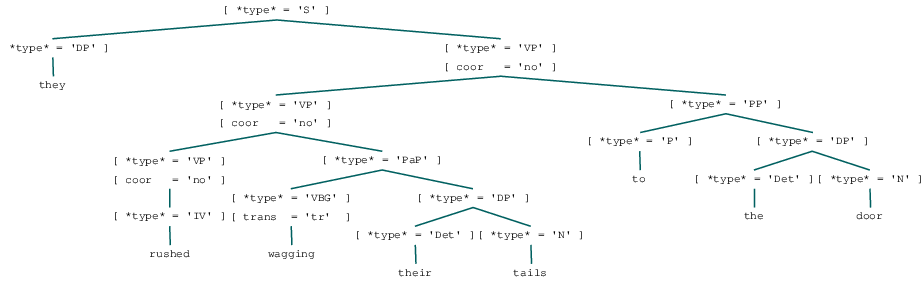

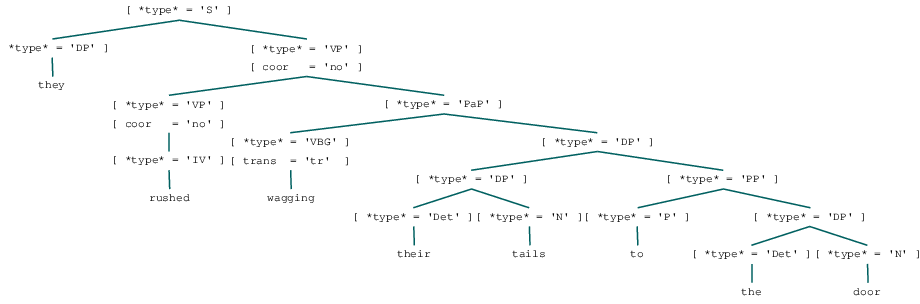

In [655]:
s7 = 'they rushed wagging their tails to the door'
parse_and_display(s7, pr)

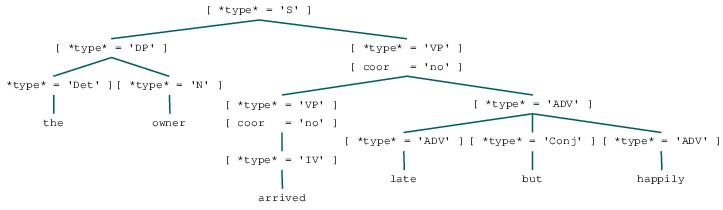

In [656]:
s8 = 'the owner arrived late but happily'
parse_and_display(s8, pr)

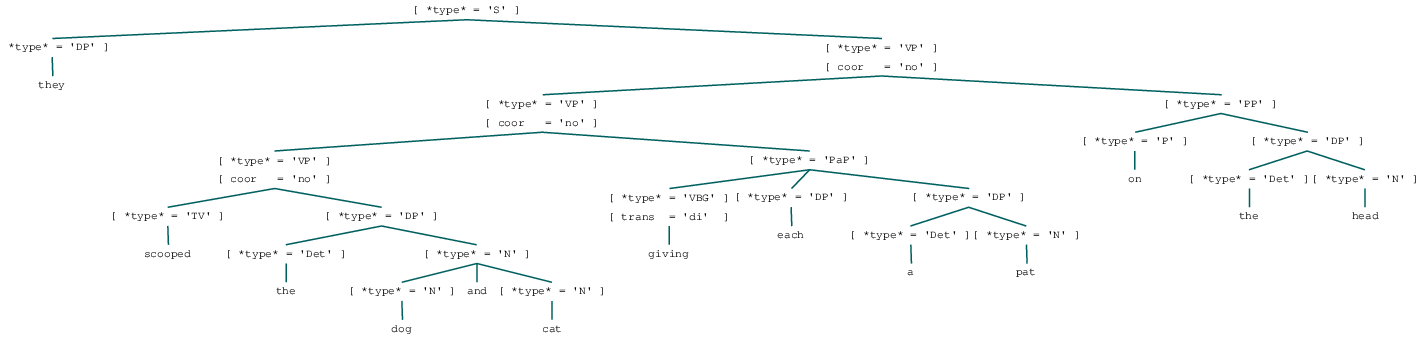

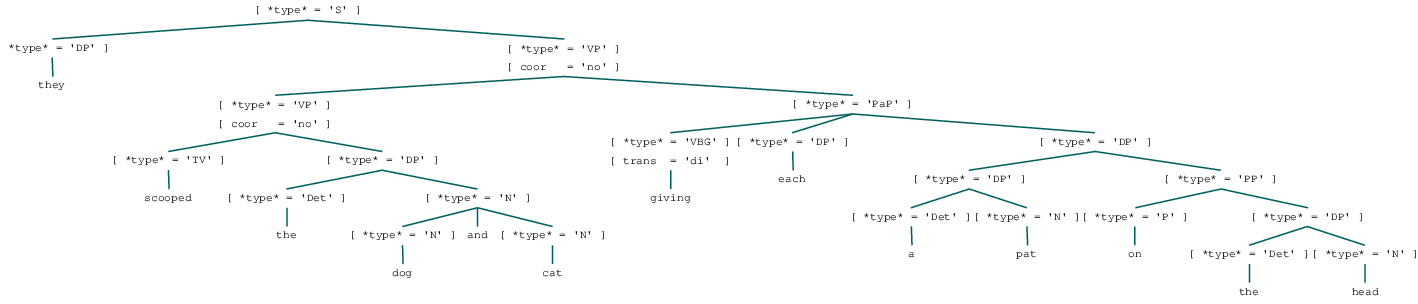

In [657]:
s9 = 'they scooped the dog and cat giving each a pat on the head'
parse_and_display(s9, pr)

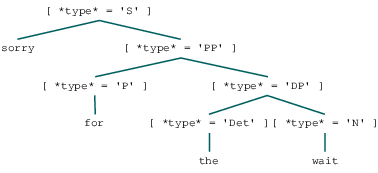

In [663]:
s10 = 'sorry for the wait'
parse_and_display(s10, pr)

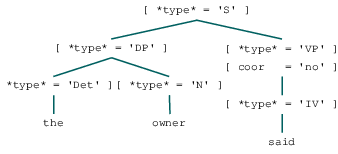

In [659]:
s11 = 'the owner said'
parse_and_display(s11, pr)

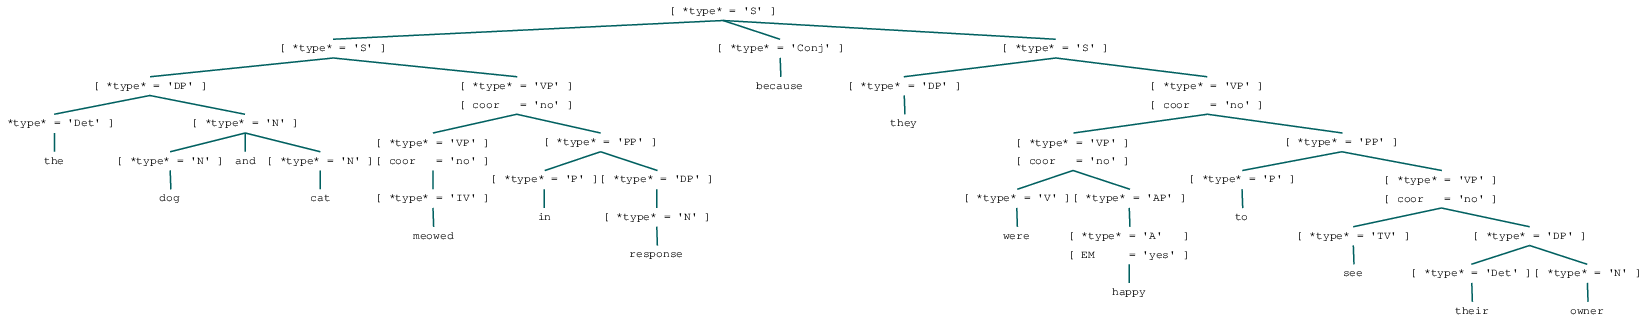

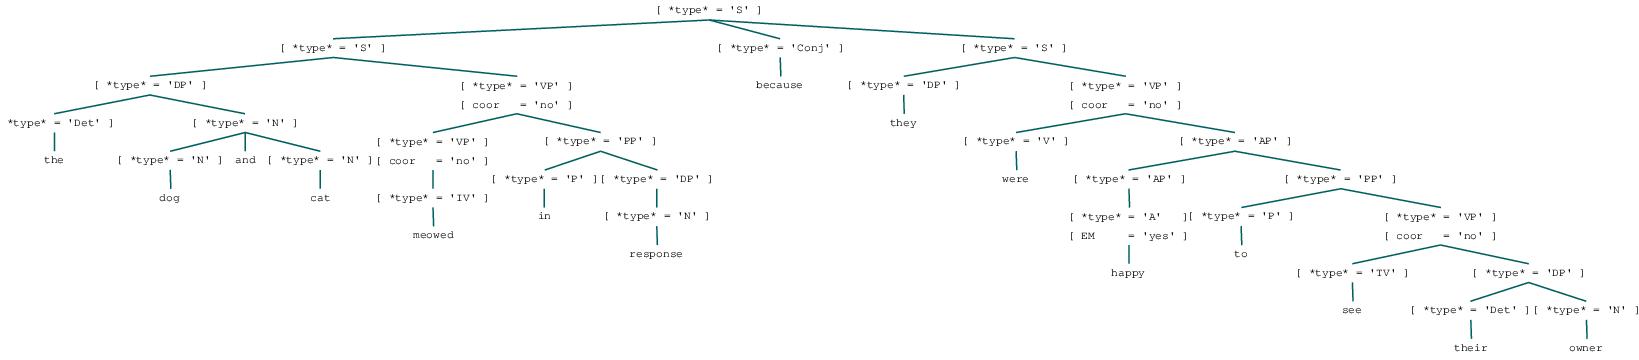

In [667]:
s12 = 'the dog and cat meowed in response because they were happy to see their owner'
parse_and_display(s12, pr)

# NOTE: 
The two stories shown below were not used to construct the grammar. They are used to see if the grammar we created will be able to include randomly generated stories. The success rates for these stories is disucssed in the write up.

## Short Story 4:

I decided to set for a walk. I walked into the house and found the dog gone. I ran worried and wagging their tail. Waiting for the dog, I hoped to see the dog running into the mind.

Excitedly, I followed the sound of a meowing cat. I walked passed waiting to see the dog. The sun began to set, and I was up for hours.

Pulling into the driveway, I saw no sign of the dog. I gave into the feeling of empty and rushed into the house. To happy, there was the dog waiting by the drawers and wagging their tail. They found a door home and I was waiting.

I rushed feeling happy but the dog was happy to be me. I scooped the dog up and gave a pat.

In [18]:
pr = load_parser('./ling4424-final.fcfg', trace=0,cache=False)

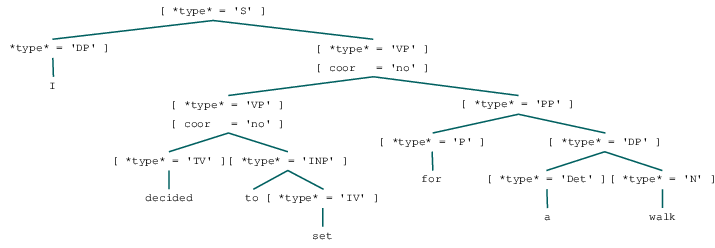

In [19]:
s1 = 'I decided to set for a walk'
parse_and_display(s1, pr)

In [20]:
s2 = 'I walked into the house and found the dog gone'
parse_and_display(s2, pr)

In [21]:
s3 = 'I ran worried and wagging their tail'
parse_and_display(s3, pr)

In [33]:
s4 = 'waiting for the dog to see the dog ran into the mind'
parse_and_display(s4, pr)

In [34]:
s5 = 'excitedly I followed the sound of a meowing cat'
parse_and_display(s5, pr)

In [35]:
s6 = 'I walked passed waiting to see the dog'
parse_and_display(s6, pr)

In [36]:
s7 = 'the sun began to set and I was up for hours'
parse_and_display(s7, pr)

In [37]:
s8 = 'pulling into the driveway I saw no sign of the dog'
parse_and_display(s8, pr)

In [38]:
s9 = 'I gave into the feeling of empty and rushed into the house'
parse_and_display(s9, pr)

In [39]:
s10 = 'to happy there was the dog waiting by the drawers and wagging their tail'
parse_and_display(s10, pr)

In [40]:
s11 = 'they found a door home and I was waiting'
parse_and_display(s11, pr)

In [41]:
s12 = 'I rushed feeling happy but the dog was happy to be me'
parse_and_display(s12, pr)

In [42]:
s13 = 'I scooped the dog up and gave a pat'
parse_and_display(s13, pr)